Topic 2 : Understanding the Formation of the Spectra in the Average Quiet Atmosphere
===
# Objectives
---
* To understand the formation of spectra in a stellar atmosphere in LTE.
* To determine the formation heights for given wavelengths
* To determine the absorption profiles from the spectra

# Principles
---
If $I_\lambda$ is known near disk center ($\mu \simeq 1$) as function of $\lambda$, and one has the standard model
of the average quiet atmosphere: $T(t_r)$, $z(t_r)$ as functions of optical depth tr at the reference
wavelength $5000\overset{\lower.5em\circ}{\mathrm{A}}$, one can determine 1) the temperature $T_1$ of the spectral formation region
at the wavelength $\lambda$, 2) the optical depth $\tau_\lambda$ and height $z$ of the spectral formation region in the model atmosphere, and 3) the relative absorption coefficient $\kappa_\lambda/\kappa_r$, under the LTE assumption.
1. Note that the intensity $I_\lambda$ emerging out of a stellar atmosphere in LTE is formally given by 
$$
I^{out}_\lambda = \int_{0}^{\infty} B_\lambda(T(t_\lambda))exp(-t_\lambda)dt_\lambda
$$
which can be reduced to a very simple form
$$
I^{out}_\lambda = B_\lambda(T_1)
$$
with the Eddington-Barbier approximation. The temperature $T_1$ is the temperature of the
region where $\tau_\lambda = 1$ and is found to be
$$
T_1 = B^{-1}_\lambda(I^{out}_\lambda)
$$
where $B^{-1}_\lambda$ is the inverse function of $B_\lambda(T)$ for the given wavelength $\lambda$.
2. By comparing $T_1$ with the run of temperature in the model atmosphere $T(t_r)$, one can
determine $\tau_r$ the optical depth of the region of $\tau_\lambda = 1$, from the relationship
$$
T_1 = T(\tau_r(\tau_\lambda = 1)),
$$
or its inversion
$$
\tau_r(\tau_\lambda = 1) = T^{-1} [T_1].
$$
3. Assuming that the absorption coefficient is independent of height, we can easily derive the relationship
$$
\frac{\kappa_\lambda}{\kappa_r} = \frac{1}{\tau_r(\tau_\lambda = 1)}
$$
that describes the variation of the absorption coefficient with wavelength.
4. The absorption coefficient ratio can be modeled like
$$
\frac{\kappa_\lambda}{\kappa_r} = \frac{\kappa_c}{\kappa_r} + \sum_{k = 0}^{N-1} \frac{\kappa_k}{\kappa_r}\frac{H(u_k,a_k)}{H(0,a_k)}
$$
with $u_k = (\lambda - \lambda_k)/\Delta\lambda_{D,k}$. The free parameters are $\kappa_c/\kappa_r$, and $\kappa_k/\kappa_r$, $\lambda_k$, $\Delta\lambda_{D,k}$ and $a_k~for~k = 0, ..., N-1$ where $N$ is the number of spectral lines in the spectral band.

# Procedures
---
The following procedures are to be taken for each of the Hα band data set and the Ca II
band data set.
1. Construct the arrays $\lambda_w$ (in $\overset{\lower.5em\circ}{\mathrm{A}}$) and $I_w$ (in data count) ($w = 0, 1, ..., N_w − 1$) representing $I_\lambda$ of the average quiet atmosphere.
2. Referring to Allen’s Astrophysical Quantities, find the value of continuum intensity in CGS unit.
3. Multiply to $I_w$ a numeric factor that makes the intensity at $\lambda - \lambda_0 = 4.5 \overset{\lower.5em\circ}{\mathrm{A}}$ be equal to 0.85 times the continuum intensity in cgs unit. Plot $I_w$ versus $\lambda_w$.
4. Determine the temperature $T_1$ using equation (3) for every $w$. Plot $T_1$ versus $\lambda$.
5. Determine the height $z$ of the formation region making use of the model atmosphere. Plot $z$ versus $\lambda$.
6. Determine the optical depth $\tau_r$ of the formation region making use of the model atmosphere. Plot $\tau_r$ versus $\lambda$.
7. Plot $\kappa_\lambda/\kappa_r$ versus $\lambda$ using equation (5).
8. Apply the non-linear square fitting to $\kappa_\lambda/\kappa_r$ using the model equation (7) to determine the free parameters.
9. Prepare a table presenting $I_\lambda/I_c$ ($I_c$ is the local continuum intensity) and $T$, $z$, $\tau_r$ of the formation region, and $\kappa_\lambda/\kappa_r$ for the following wavelengths:
    * Hα band: continuum wavelength, $\lambda − \lambda_0 = 1, 2, 4 \overset{\lower.5em\circ}{\mathrm{A}}$, the center of the line near $\lambda − \lambda_0 = −3.3 \overset{\lower.5em\circ}{\mathrm{A}}$
    * Ca II band: continuum wavelength, $\lambda − \lambda_0 = 1, 2, 4, 0.6 \overset{\lower.5em\circ}{\mathrm{A}}$, the center of the line near $\lambda − \lambda_0 = −5.8 \overset{\lower.5em\circ}{\mathrm{A}}$
10. Discuss together what you found and learned from these procedures.

In [1]:
# FUNDMENTAL SETTING
# INTERNAL MODULES
import os
from os.path import join
from time import time
import multiprocessing as mp
from multiprocessing import Pool, Process, Queue, Manager

# STANDARD MODULES
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from matplotlib import colors

from scipy import integrate, interpolate
from scipy import stats
import scipy.special as special
from scipy.special import expn, wofz, gamma
from scipy.optimize import curve_fit, minimize

from sklearn.decomposition import PCA
from sklearn.metrics import mutual_info_score

import emcee
import corner

# LOCAL MODULES


# CONFIGURATION
%config InlineBackend.figure_format='retina'
#%matplotlib inline

plt.rcParams['font.size'] = 15
plt.rc('legend', fontsize=12)
plt.rcParams['font.family'] = 'sans'
plt.rcParams['mathtext.fontset'] = 'dejavuserif'
#plt.rcParams['text.usetex'] = True

plt.rcParams['axes.linewidth']=2
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.minor.visible']=True
plt.rcParams['ytick.minor.visible']=True
plt.rcParams['xtick.major.size'] = 7
plt.rcParams['ytick.major.size'] = 7
plt.rcParams['xtick.minor.size'] = 3.5
plt.rcParams['ytick.minor.size'] = 3.5
plt.rcParams['xtick.major.width'] = 1.5
plt.rcParams['ytick.major.width'] = 1.5
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.minor.width'] = 1
plt.rcParams['ytick.right'] = True
plt.rcParams['xtick.top'] = True

In [2]:
# IMPORT FISS FILE
from fisspy.read import FISS

# read current directory path
# dirn = os.getcwd()
dirn = '/Users/kangsoosang/Lectures/lab2/data'

# read data from observation
data_Ha = join(dirn, 'FISS_20130717_191246_A1_c.fts') 
data_Ca = join(dirn, 'FISS_20130717_191246_B1_c.fts')
Ha = FISS(data_Ha)
Ca = FISS(data_Ca)

In [3]:
Ha.data.shape

(256, 250, 512)

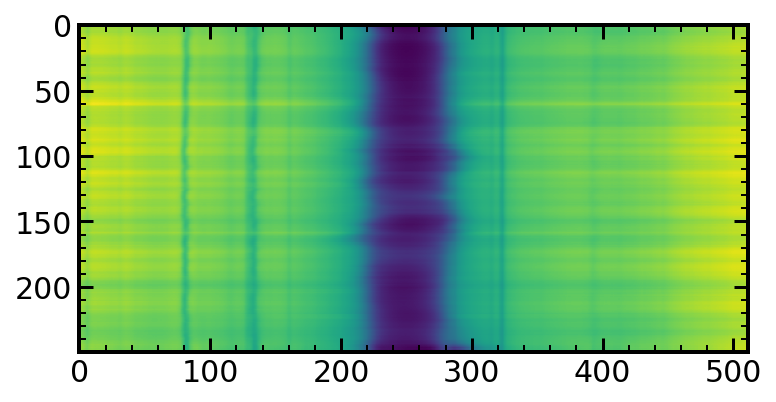

In [4]:
plt.imshow(Ha.data[0,:,:])

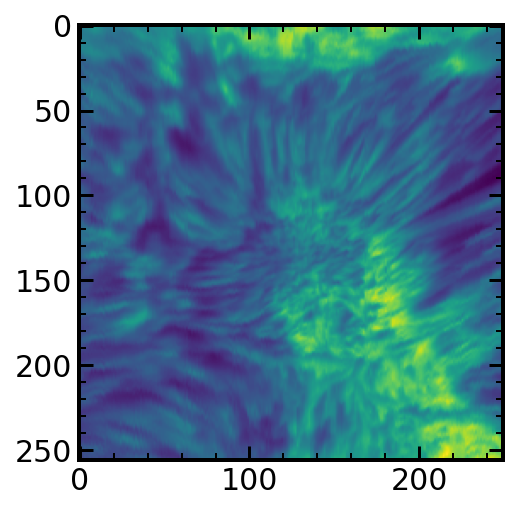

In [5]:
plt.imshow(Ha.data[:,:,250])

In [3]:
# IMPORT 'FAL-C' MODEL

# read data from modeling
dirn = '/Users/kangsoosang/Lectures/lab2/data'
modelFile = join(dirn,'falc.dat')
model = np.loadtxt(modelFile)

# referred to the Allen's Astrophysical Quantities
HEIGHTS = model[:,0] # in km
TAU_500 = model[:,1] 
COLUMN_DENSITY = model[:,2] # in g cm^-2
TEMPERATURE = model[:,3] # in K
V_TURBULENT = model[:,4] # in km s^-1
N_HYDROGEN = model[:,5] # in cm^-3
N_PROTON = model[:,6] # in cm^-3
N_ELECTRON = model[:,7] # in cm^-3
P_TOTAL = model[:,8] # in dyn cm^-2
P_GAS2TOT = model[:,9] 
DENSITY = model[:,10] # in g cm^-3

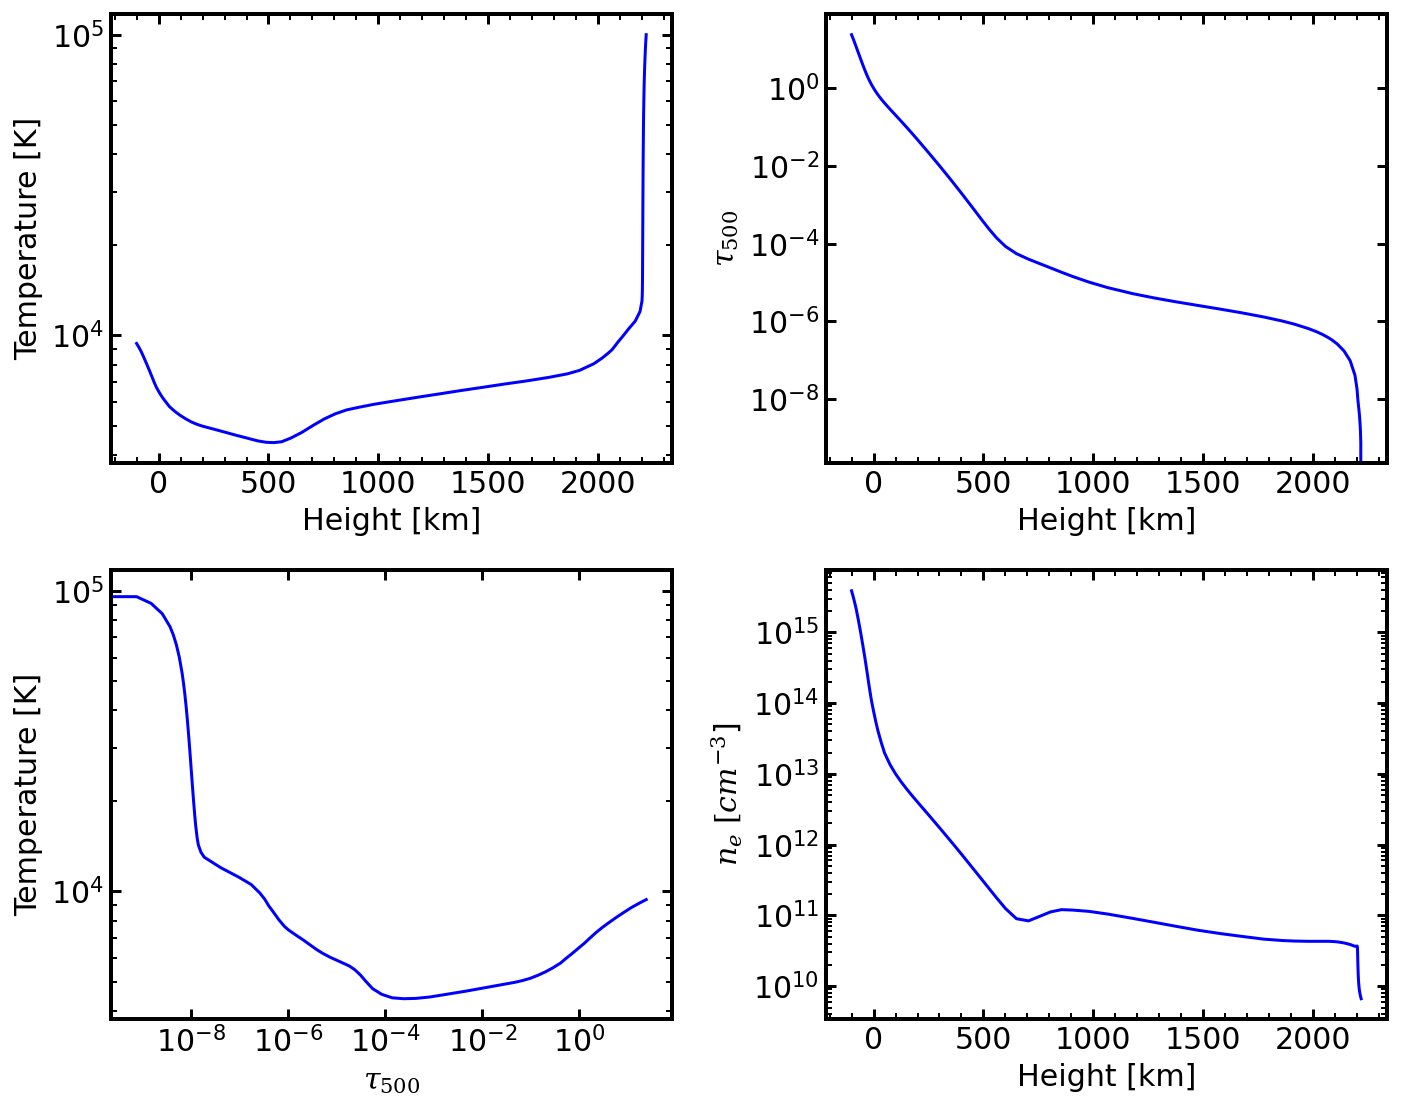

In [4]:
# PLOT 'FAL_C' MODEL 1

# set figures
fig, ax = plt.subplots(2,2, figsize=[10,8])

ax[0,0].semilogy(HEIGHTS, TEMPERATURE, 'b')
ax[0,0].set_xlabel('Height [km]')
ax[0,0].set_ylabel('Temperature [K]')

ax[0,1].semilogy(HEIGHTS, TAU_500, 'b')
ax[0,1].set_xlabel('Height [km]')
ax[0,1].set_ylabel(r'$\tau_{500}$')

ax[1,0].loglog(TAU_500, TEMPERATURE, 'b')
ax[1,0].set_xlabel(r'$\tau_{500}$')
ax[1,0].set_ylabel('Temperature [K]')

ax[1,1].semilogy(HEIGHTS, N_ELECTRON, 'b')
ax[1,1].set_xlabel('Height [km]')
ax[1,1].set_ylabel(r'$n_e$ $[cm^{-3}$]')

for i in range(2):
    for j in range(2):
        ax[i,j].tick_params(direction='in', length=5)
        ax[i,j].tick_params(which='minor', direction='in', length=3)
    
fig.tight_layout()
#plt.savefig('.pdf', format='pdf', dpi=1000)
plt.show()

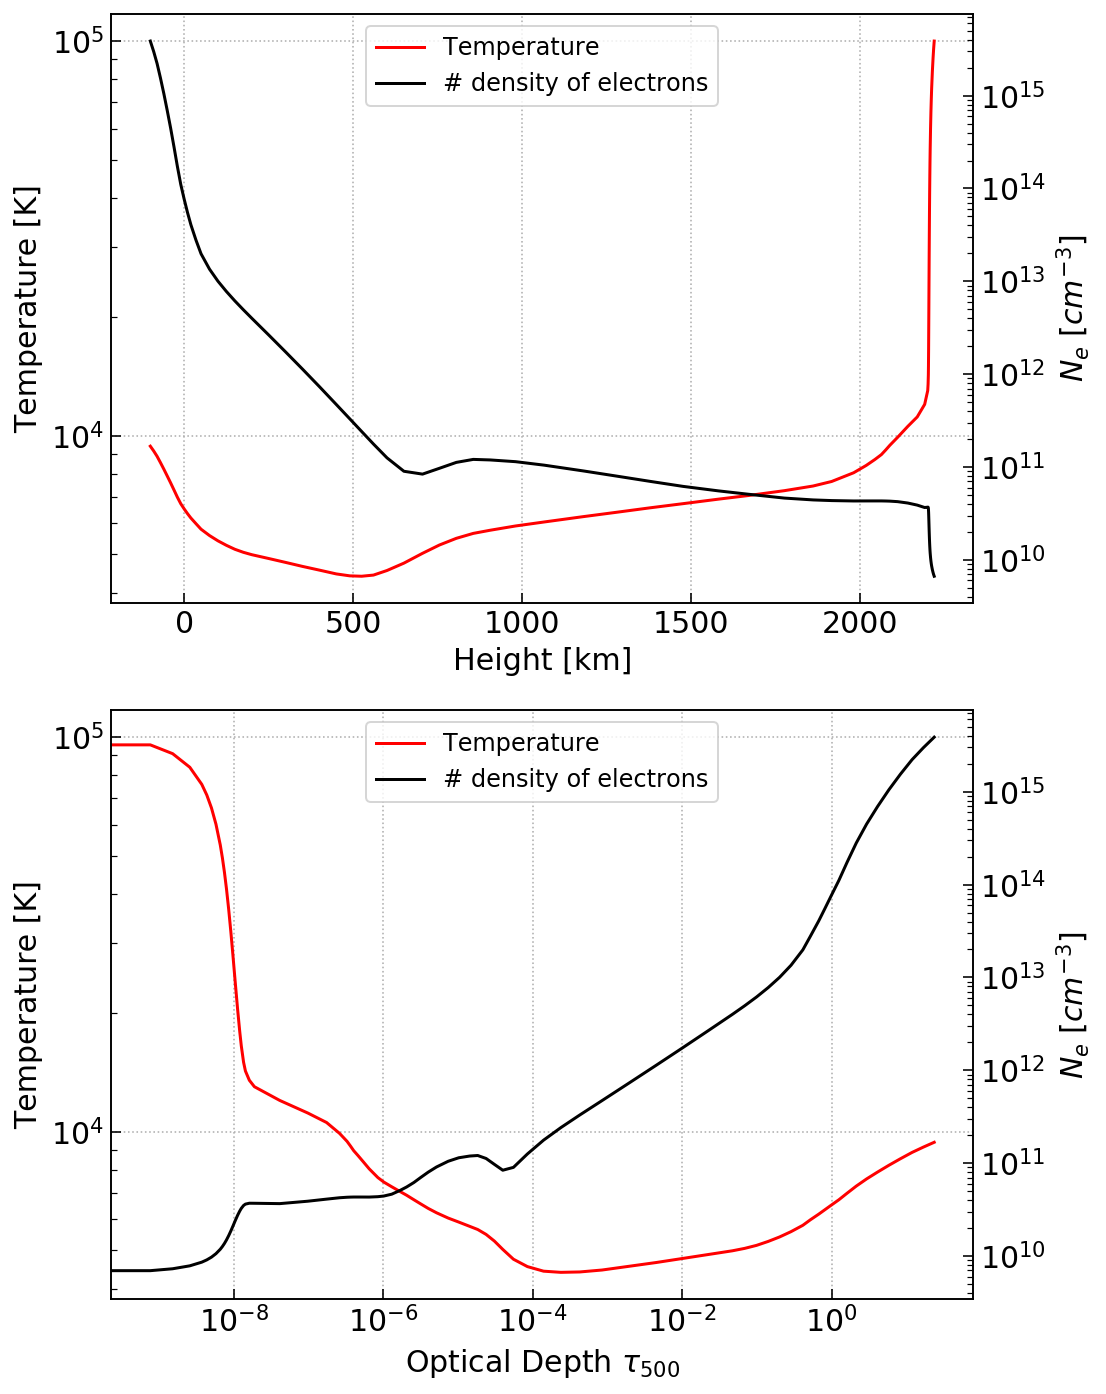

In [22]:
# PLOT 'FAL-C' MODEL 2

# set figures
fig, ax = plt.subplots(2, figsize=(8,10))

# height to temperature and n_el
ax0 = ax[0].twinx()
line_T = ax[0].semilogy(HEIGHTS, TEMPERATURE, 'r', label='Temperature')
line_Nel = ax0.semilogy(HEIGHTS, N_ELECTRON, 'k', label='# density of electrons')
    
ax[0].set_xlabel('Height [km]')
ax[0].set_ylabel('Temperature [K]')
ax0.set_ylabel(r'$N_e$ [$cm^{-3}$]')
    
#ax[0].set_xlim(-200,2300)
#ax[0].set_ylim(0, 1e5)
#ax0.set_ylim(1e9, 1e16)
ax[0].grid(ls=':')
ax[0].tick_params(direction='in', length=5)
ax[0].tick_params(which='minor', direction='in', length=3)
ax0.tick_params(direction='in', length=5)
ax0.tick_params(which='minor', direction='in', length=3)
    
lines = line_T + line_Nel
labels = [l.get_label() for l in lines]
plt.legend(lines, labels, loc=9)

# optical depth to temperature and n_el
ax1 = ax[1].twinx()
line_T = ax[1].loglog(TAU_500, TEMPERATURE, 'r', label='Temperature')
line_Nel = ax1.loglog(TAU_500, N_ELECTRON, 'k', label='# density of electrons')
    
ax[1].set_xlabel(r'Optical Depth $\tau_{500}$')
ax[1].set_ylabel('Temperature [K]')
ax1.set_ylabel(r'$N_e$ [$cm^{-3}$]')

#ax[1].set_xlim(1e2, 1e-10)
#ax[1].set_ylim(0, 1e5)
#ax1.set_ylim(1e9, 1e16)
ax[1].grid(ls=':')
ax[1].tick_params(direction='in', length=5)
ax[1].tick_params(which='minor', direction='in', length=3)
ax1.tick_params(direction='in', length=5)
ax1.tick_params(which='minor', direction='in', length=3)
    
lines = line_T + line_Nel
labels = [l.get_label() for l in lines]
plt.legend(lines, labels, loc=9)

fig.tight_layout()
#plt.savefig('.pdf', format='pdf', dpi=1000)
plt.show()

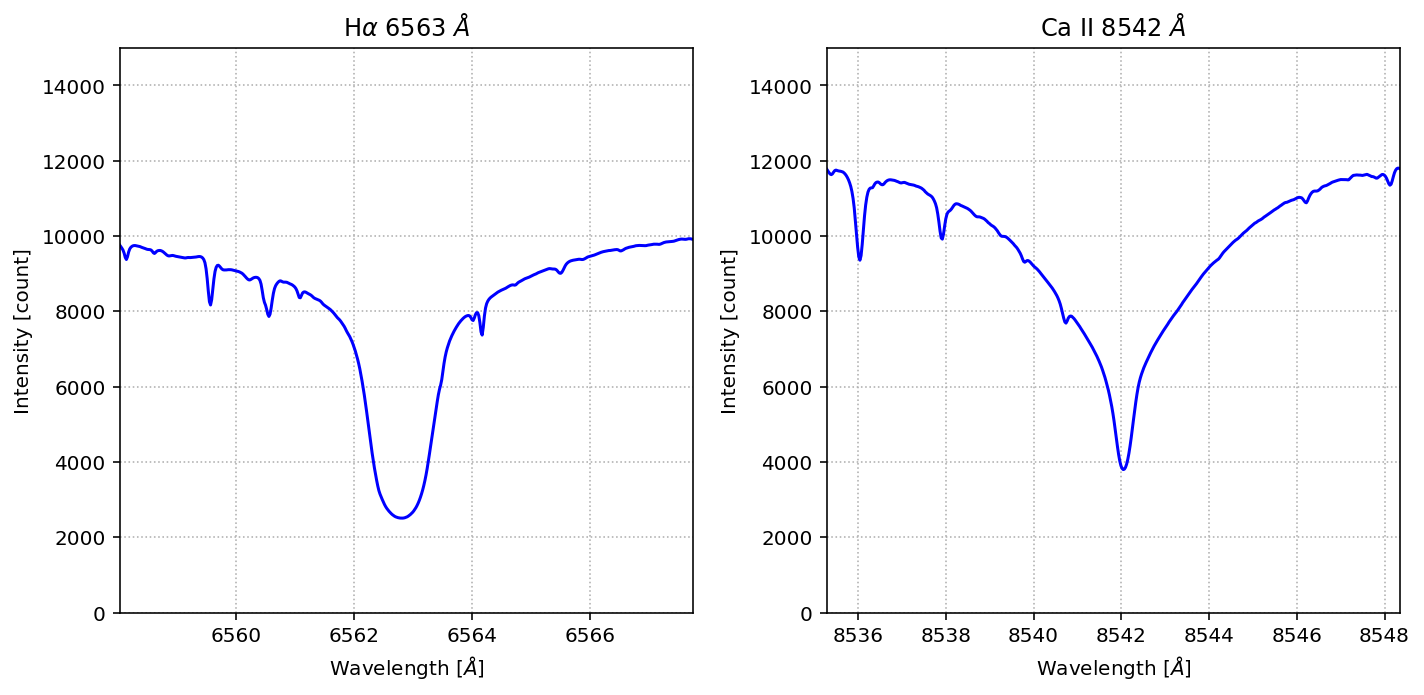

In [7]:
# Plot Specific Intensity with data counts!

# set figures
fig, ax = plt.subplots(1,2, figsize=(10,5))

# H alpha
ax[0].plot(Ha.wave, Ha.refProfile, 'b')
ax[0].set_xlim(Ha.wave.min(), Ha.wave.max())
ax[0].set_ylim(0, 1.5e4)
ax[0].set_title(r'H$\alpha$ 6563 $\AA$')
ax[0].set_xlabel(r'Wavelength [$\AA$]')
ax[0].set_ylabel('Intensity [count]')
ax[0].grid(ls=':')

# Ca II
ax[1].plot(Ca.wave, Ca.refProfile, 'b')
ax[1].set_xlim(Ca.wave.min(), Ca.wave.max())
ax[1].set_ylim(0, 1.5e4)
ax[1].set_title(r'Ca II 8542 $\AA$')
ax[1].set_xlabel(r'Wavelength [$\AA$]')
ax[1].set_ylabel('Intensity [count]')
ax[1].grid(ls=':')

fig.tight_layout()
#plt.savefig('.pdf', format='pdf', dpi=1000)
plt.show()

In [5]:
# Interpolation function!
def interpolation(x, y, y_crit):
    values = []
    for i in range(len(x)):
        if y[i] == y_crit:
            value = x[i]
            values.append(value)
    for i in range(len(x)-1):
        if (y[i+1] - y_crit)*(y[i] - y_crit) < 0:
            value = x[i] + (y_crit - y[i])*(x[i+1] - x[i])/(y[i+1] - y[i])
            values.append(value)
    
    if len(values) == 1:
        return values[0]
    elif len(values) > 1:
        return sorted(values)

In [10]:
# Plot Specific Intensity with CGS unit!

# referring to Allen's Astronomical Quantities, the values of continuum intensity
Ic_Ha = 2.90 # [1e6 erg/s/cm^2/str/A]
Ic_Ca = 1.775 # [1e6 erg/s/cm^2/str/A]

# calibrate intensity in CGS unit
wv_ref_Ha = Ha.waveRef + 4.5
wv_ref_Ca = Ca.waveRef + 4.5
inten_ref_Ha = interpolation(Ha.refProfile, Ha.wave, wv_ref_Ha)
inten_ref_Ca = interpolation(Ca.refProfile, Ca.wave, wv_ref_Ca)

k_Ha = 0.85*Ic_Ha/inten_ref_Ha
k_Ca = 0.85*Ic_Ca/inten_ref_Ca
print('k value of Ha = ', k_Ha)
print('k value of Ca = ', k_Ca)

# set figures
fig, ax = plt.subplots(1,2, figsize=(10,5))

# H alpha
ax[0].plot(Ha.wave, Ha.refProfile*k_Ha, 'b')
ax[0].set_xlim(Ha.wave.min(), Ha.wave.max())
ax[0].set_ylim(0, 3)
ax[0].set_title(r'H$\alpha$ 6563 $\AA$')
ax[0].set_xlabel(r'Wavelength [$\AA$]')
ax[0].set_ylabel(r'Intensity [$10^{6}$erg/s/cm$^{2}$/sr/$\AA$]')
ax[0].grid(ls=':')

# Ca II
ax[1].plot(Ca.wave, Ca.refProfile*k_Ca, 'b')
ax[1].set_xlim(Ca.wave.min(), Ca.wave.max())
ax[1].set_ylim(0, 3)
ax[1].set_title(r'Ca II 8542 $\AA$')
ax[1].set_xlabel(r'Wavelength [$\AA$]')
ax[1].set_ylabel(r'Intensity [$10^{6}$erg/s/cm$^{2}$/sr/$\AA$]')
ax[1].grid(ls=':')

fig.tight_layout()
#plt.savefig('.pdf', format='pdf', dpi=1000)
plt.show()

AttributeError: 'FISS' object has no attribute 'waveRef'

In [7]:
# Inverse Planck function to calculate corresponding temperatures!
def Temperature(wv, I):
    T = []
    c = 2.998*1e+10   #Speed of light [cm/s]
    h = 6.626*1e-27   #Planck constant [erg*s]
    k = 1.381*1e-16   #Boltzmann constant [erg/K]
    const1 = h*c/k
    const2 = 2*h*c**2*1e-14
    
    for i in range(len(wv)):
        wv_cm = wv[i]*1e-8
        T.append(const1/(wv_cm*np.log(1 + const2/wv_cm**5/I[i])))
    return np.asarray(T)

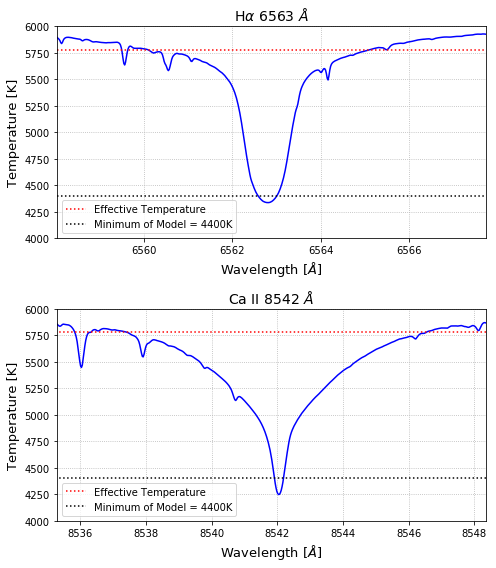

In [8]:
# Calculate T1 using Inverse Planck function!

T1_Ha = Temperature(Ha.wv, Ha.refProfile*k_Ha)
T1_Ca = Temperature(Ca.wv, Ca.refProfile*k_Ca)
T_EFF = 5780 #[K]

# set figures
fig, ax = plt.subplots(2,1, figsize=(7,8))
tsize = 14 #title size
fsize = 13 #font size

# H alpha
ax[0].plot(Ha.wv, T1_Ha, 'b')
ax[0].plot(Ha.wv, T_EFF*np.ones(len(T1_Ha)), 'r:', label='Effective Temperature')
ax[0].plot(Ha.wv, min(TEMPERATURE)*np.ones(len(T1_Ha)), 'k:', label='Minimum of Model = 4400K')
ax[0].set_xlim(Ha.wv.min(), Ha.wv.max())
ax[0].set_ylim(4000, 6000)
ax[0].set_title(r'H$\alpha$ 6563 $\AA$', fontsize=tsize)
ax[0].set_xlabel(r'Wavelength [$\AA$]', fontsize=fsize)
ax[0].set_ylabel('Temperature [K]', fontsize=fsize)
ax[0].legend()
ax[0].grid(ls=':')

# Ca II
ax[1].plot(Ca.wv, T1_Ca, 'b')
ax[1].plot(Ca.wv, T_EFF*np.ones(len(T1_Ca)), 'r:', label='Effective Temperature')
ax[1].plot(Ca.wv, min(TEMPERATURE)*np.ones(len(T1_Ca)), 'k:', label='Minimum of Model = 4400K')
ax[1].set_xlim(Ca.wv.min(), Ca.wv.max())
ax[1].set_ylim(4000, 6000)
ax[1].set_title(r'Ca II 8542 $\AA$', fontsize=tsize)
ax[1].set_xlabel(r'Wavelength [$\AA$]', fontsize=fsize)
ax[1].set_ylabel('Temperature [K]', fontsize=fsize)
ax[1].legend()
ax[1].grid(ls=':')

fig.tight_layout()
#plt.savefig('.pdf', format='pdf', dpi=1000)
plt.show()

In [9]:
# Linear Extrapolation the region under the 4400 K, which is the minimum temperature of model!

from scipy.interpolate import interp1d

x = HEIGHTS[54:80]
y = TEMPERATURE[54:80]
z = TAU_500[54:80]

# 1 : linear extrapolation with respect to height
temp_extpol1 = interp1d(x, y, fill_value='extrapolate')

# 2 : linear extrapolation with respect to reference optical depth
temp_extpol2 = interp1d(np.log(z), y, fill_value='extrapolate')

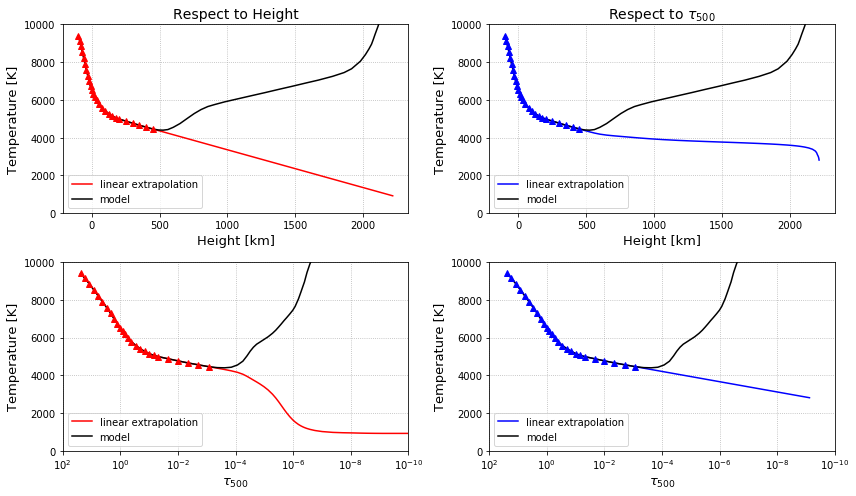

In [10]:
# Plot the extrapolation graphs!

# set figures
fig, ax = plt.subplots(2, 2, figsize=(12,7))
tsize = 14 #title size
fsize = 13 #font size

# height to temperature (1)
ax[0,0].plot(HEIGHTS, temp_extpol1(HEIGHTS), 'r-', label='linear extrapolation')
ax[0,0].plot(HEIGHTS, TEMPERATURE, 'k', label='model')
ax[0,0].plot(HEIGHTS[54:80], TEMPERATURE[54:80], 'r^')

ax[0,0].set_title('Respect to Height', fontsize=tsize)
ax[0,0].set_xlabel('Height [km]', fontsize=fsize)
ax[0,0].set_ylabel('Temperature [K]', fontsize=fsize)
ax[0,0].set_ylim(0,1e4)
ax[0,0].legend()
ax[0,0].grid(ls=':')

# optical depth to temperature (1)
ax[1,0].plot(TAU_500, temp_extpol1(HEIGHTS), 'r-', label='linear extrapolation')
ax[1,0].plot(TAU_500, TEMPERATURE, 'k', label='model')
ax[1,0].plot(TAU_500[54:80], TEMPERATURE[54:80], 'r^')

ax[1,0].set_xlabel(r'$\tau_{500}$', fontsize=fsize)
ax[1,0].set_ylabel('Temperature [K]', fontsize=fsize)
ax[1,0].set_xlim(1e2, 1e-10)
ax[1,0].set_ylim(0,1e4)
ax[1,0].set_xscale('log')
ax[1,0].legend()
ax[1,0].grid(ls=':')

# temperature for extrapolation 2
temp2 = temp_extpol2(np.log(TAU_500[1:]))

# height to temperature (2)
ax[0,1].plot(HEIGHTS[1:], temp2, 'b-', label='linear extrapolation')
ax[0,1].plot(HEIGHTS, TEMPERATURE, 'k', label='model')
ax[0,1].plot(HEIGHTS[54:80], TEMPERATURE[54:80], 'b^')

ax[0,1].set_title(r'Respect to $\tau_{500}$', fontsize=tsize)
ax[0,1].set_xlabel('Height [km]', fontsize=fsize)
ax[0,1].set_ylabel('Temperature [K]', fontsize=fsize)
ax[0,1].set_ylim(0,1e4)
ax[0,1].legend()
ax[0,1].grid(ls=':')

# optical depth to temperature (2)
ax[1,1].plot(TAU_500[1:], temp2, 'b-', label='linear extrapolation')
ax[1,1].plot(TAU_500, TEMPERATURE, 'k', label='model')
ax[1,1].plot(TAU_500[54:80], TEMPERATURE[54:80], 'b^')

ax[1,1].set_xlabel(r'$\tau_{500}$', fontsize=fsize)
ax[1,1].set_ylabel('Temperature [K]', fontsize=fsize)
ax[1,1].set_xlim(1e2, 1e-10)
ax[1,1].set_ylim(0,1e4)
ax[1,1].set_xscale('log')
ax[1,1].legend()
ax[1,1].grid(ls=':')

fig.tight_layout()
#plt.savefig('.pdf', format='pdf', dpi=1000)
plt.show()

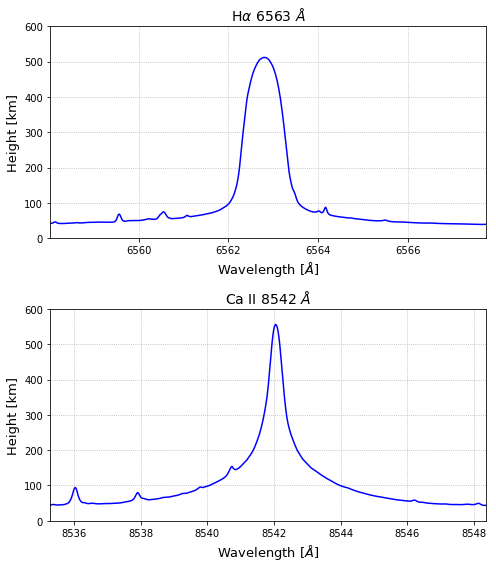

In [11]:
# Plot height versus wavelength applied extrapolation 1!
x = TEMPERATURE[54:80]
y = HEIGHTS[54:80]
func_height = interp1d(x, y, fill_value='extrapolate')

height_Ha = func_height(T1_Ha)
height_Ca = func_height(T1_Ca)

# set figures
fig, ax = plt.subplots(2,1, figsize=(7,8))
tsize = 14 #title size
fsize = 13 #font size

# H alpha
ax[0].plot(Ha.wv, height_Ha, 'b')
ax[0].set_xlim(Ha.wv.min(), Ha.wv.max())
ax[0].set_ylim(0, 600)
ax[0].set_title(r'H$\alpha$ 6563 $\AA$', fontsize=tsize)
ax[0].set_xlabel(r'Wavelength [$\AA$]', fontsize=fsize)
ax[0].set_ylabel('Height [km]', fontsize=fsize)
ax[0].grid(ls=':')

# Ca II
ax[1].plot(Ca.wv, height_Ca, 'b')
ax[1].set_xlim(Ca.wv.min(), Ca.wv.max())
ax[1].set_ylim(0, 600)
ax[1].set_title(r'Ca II 8542 $\AA$', fontsize=tsize)
ax[1].set_xlabel(r'Wavelength [$\AA$]', fontsize=fsize)
ax[1].set_ylabel('Height [km]', fontsize=fsize)
ax[1].grid(ls=':')

fig.tight_layout()
#plt.savefig('.pdf', format='pdf', dpi=1000)
plt.show()

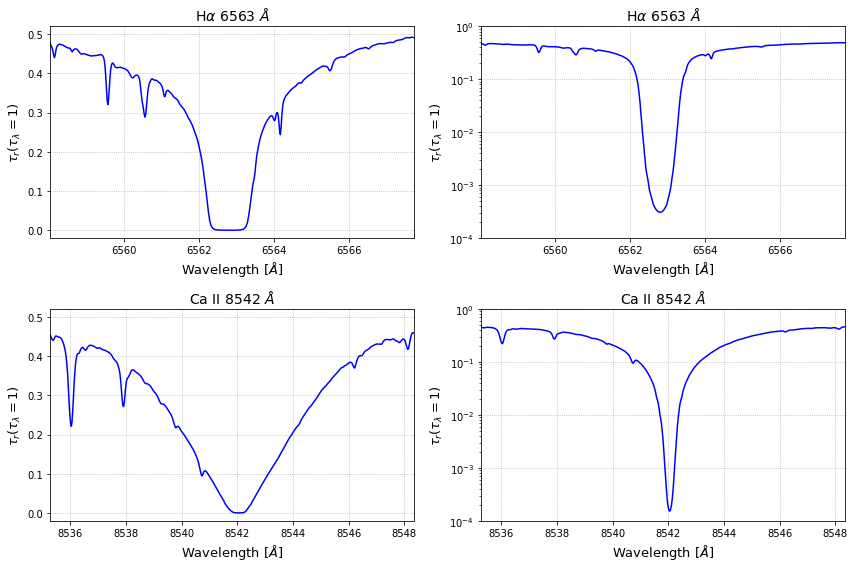

In [12]:
# Plot ref. optical depth versus wavelength applied extrapolation 1!

taur_Ha = []
taur_Ca = []
for h in height_Ha:
    taur_Ha.append(interpolation(TAU_500, HEIGHTS, h))
for h in height_Ca:
    taur_Ca.append(interpolation(TAU_500, HEIGHTS, h))
taur_Ha = np.asarray(taur_Ha)
taur_Ca = np.asarray(taur_Ca)

# set figures
fig, ax = plt.subplots(2,2, figsize=(12,8))
tsize = 14 #title size
fsize = 13 #font size

# H alpha
ax[0,0].plot(Ha.wv, taur_Ha, 'b')
ax[0,0].set_xlim(Ha.wv.min(), Ha.wv.max())
ax[0,0].set_ylim(-0.02, 0.52)
ax[0,0].set_title(r'H$\alpha$ 6563 $\AA$', fontsize=tsize)
ax[0,0].set_xlabel(r'Wavelength [$\AA$]', fontsize=fsize)
ax[0,0].set_ylabel(r'$\tau_r (\tau_\lambda=1)$', fontsize=fsize)
ax[0,0].grid(ls=':')

# H alpha with log yscale
ax[0,1].plot(Ha.wv, taur_Ha, 'b')
ax[0,1].set_xlim(Ha.wv.min(), Ha.wv.max())
ax[0,1].set_ylim(1e-4,1)
ax[0,1].set_yscale('log')
ax[0,1].set_title(r'H$\alpha$ 6563 $\AA$', fontsize=tsize)
ax[0,1].set_xlabel(r'Wavelength [$\AA$]', fontsize=fsize)
ax[0,1].set_ylabel(r'$\tau_r (\tau_\lambda=1)$', fontsize=fsize)
ax[0,1].grid(ls=':')

# Ca II
ax[1,0].plot(Ca.wv, taur_Ca, 'b')
ax[1,0].set_xlim(Ca.wv.min(), Ca.wv.max())
ax[1,0].set_ylim(-0.02, 0.52)
ax[1,0].set_title(r'Ca II 8542 $\AA$', fontsize=tsize)
ax[1,0].set_xlabel(r'Wavelength [$\AA$]', fontsize=fsize)
ax[1,0].set_ylabel(r'$\tau_r (\tau_\lambda=1)$', fontsize=fsize)
ax[1,0].grid(ls=':')

# Ca II with log yscale
ax[1,1].plot(Ca.wv, taur_Ca, 'b')
ax[1,1].set_xlim(Ca.wv.min(), Ca.wv.max())
ax[1,1].set_ylim(1e-4,1)
ax[1,1].set_yscale('log')
ax[1,1].set_title(r'Ca II 8542 $\AA$', fontsize=tsize)
ax[1,1].set_xlabel(r'Wavelength [$\AA$]', fontsize=fsize)
ax[1,1].set_ylabel(r'$\tau_r (\tau_\lambda=1)$', fontsize=fsize)
ax[1,1].grid(ls=':')

fig.tight_layout()
#plt.savefig('.pdf', format='pdf', dpi=1000)
plt.show()

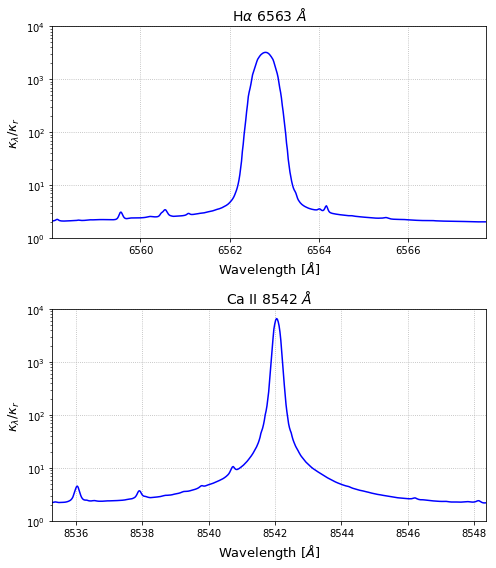

In [13]:
# Draw absorption coefficient versus wavelength applied extrapolation 1!

kappa_Ha = 1/taur_Ha
kappa_Ca = 1/taur_Ca

# set figures
fig, ax = plt.subplots(2,1, figsize=(7,8))
tsize = 14 #title size
fsize = 13 #font size

# H alpha
ax[0].plot(Ha.wv, kappa_Ha, 'b')
ax[0].set_xlim(Ha.wv.min(), Ha.wv.max())
ax[0].set_ylim(1, 1e4)
ax[0].set_title(r'H$\alpha$ 6563 $\AA$', fontsize=tsize)
ax[0].set_xlabel(r'Wavelength [$\AA$]', fontsize=fsize)
ax[0].set_ylabel(r'$\kappa_\lambda/\kappa_r$', fontsize=fsize)
ax[0].set_yscale('log')
ax[0].grid(ls=':')

# Ca II
ax[1].plot(Ca.wv, kappa_Ca, 'b')
ax[1].set_xlim(Ca.wv.min(), Ca.wv.max())
ax[1].set_ylim(1, 1e4)
ax[1].set_title(r'Ca II 8542 $\AA$', fontsize=tsize)
ax[1].set_xlabel(r'Wavelength [$\AA$]', fontsize=fsize)
ax[1].set_ylabel(r'$\kappa_\lambda/\kappa_r$', fontsize=fsize)
ax[1].set_yscale('log')
ax[1].grid(ls=':')

fig.tight_layout()
#plt.savefig('.pdf', format='pdf', dpi=1000)
plt.show()

In [14]:
# A table presenting I/Ic, T, z, tr of formation region, k/kc!
from astropy.table import Table

Ha_dl = [1, 2, 4, -3.3]
Ca_dl = [0.6, 1, 2, 4, -5.8]

para_name = ['wv - wv_0', 'Intensity', 'Temperature', 'Height', 't_r', 'k_wv/k_r']
para_unit = ['AA', '10^6 erg/s cm2 sr AA', 'K', 'km', '', '']

Ha_table = Table(data=[[] for i in range(len(para_name))], names=para_name)
Ca_table = Table(data=[[] for i in range(len(para_name))], names=para_name)
for i, name in enumerate(para_name):
    Ha_table[name].format = '.4f'
    Ha_table[name].unit = para_unit[i]
    Ca_table[name].format = '.4f'
    Ca_table[name].unit = para_unit[i]
    
for i in range(len(Ha_dl)):
    wv = Ha.wvRef + Ha_dl[i]
    I = interpolation(Ha.refProfile*k_Ha, Ha.wv, wv)
    T = interpolation(T1_Ha, Ha.wv, wv)
    height = interpolation(height_Ha, Ha.wv, wv)
    taur = interpolation(taur_Ha, Ha.wv, wv)
    kappa = interpolation(kappa_Ha, Ha.wv, wv)
    
    Ha_table.add_row([Ha_dl[i], I, T, height, taur, kappa])
    
for i in range(len(Ca_dl)):
    wv = Ca.wvRef + Ca_dl[i]
    I = interpolation(Ca.refProfile*k_Ca, Ca.wv, wv)
    T = interpolation(T1_Ca, Ca.wv, wv)
    height = interpolation(height_Ca, Ca.wv, wv)
    taur = interpolation(taur_Ca, Ca.wv, wv)
    kappa = interpolation(kappa_Ca, Ca.wv, wv)
    
    Ca_table.add_row([Ca_dl[i], I, T, height, taur, kappa])
    
print('Ha 6563')
print(Ha_table)
print('Ca 8542')
print(Ca_table)

Ha 6563
wv - wv_0            Intensity            Temperature  Height  t_r   k_wv/k_r
 Angstrom 1e+06 erg / (Angstrom cm2 s sr)      K         km                  
--------- ------------------------------- ----------- ------- ------ --------
   1.0000                          1.9437   5565.4772 77.1357 0.2801   3.5701
   2.0000                          2.2022   5744.0602 55.4690 0.3857   2.5928
   4.0000                          2.4404   5899.7743 41.3336 0.4759   2.1011
  -3.3000                          2.1690   5720.3908 58.2868 0.3715   2.6969
Ca 8542
wv - wv_0            Intensity            Temperature  Height   t_r   k_wv/k_r
 Angstrom 1e+06 erg / (Angstrom cm2 s sr)      K         km                   
--------- ------------------------------- ----------- -------- ------ --------
   0.6000                          0.9272   4988.5788 200.7355 0.0470  21.2796
   1.0000                          1.0300   5143.0999 151.9262 0.0969  10.3226
   2.0000                          1.2374  

In [15]:
# Voigt Fitting Function!
from scipy.special import wofz
from scipy.optimize import curve_fit

def G(x, alpha):
    """ Return Gaussian line shape at x with HWHM alpha """
    return np.sqrt(np.log(2) / np.pi) / alpha * np.exp(-(x / alpha)**2 * np.log(2))

def L(x, gamma):
    """ Return Lorentzian line shape at x with HWHM gamma """
    return gamma / np.pi / (x**2 + gamma**2)

def V(x, alpha, gamma):
    """
    Return the Voigt line shape at x with Lorentzian component HWHM gamma
    and Gaussian component HWHM alpha.

    """
    sigma = alpha / np.sqrt(np.log(2))

    return np.real(wofz((x + 1j*gamma)/sigma)) / sigma / np.sqrt(np.pi)

def Kratio(x, offset, x0, peak, fwhm, a):
    N = len(x0) # number of lines
    alpha = fwhm * np.sqrt(np.log(2))
    gamma = fwhm * a
    func = offset
    
    for i in range(N):
        H = V(x-x0[i], alpha[i], gamma[i])
        H0 = V(0, alpha[i], gamma[i])
        
        lineprof = peak[i] * H / H0 # rescaled lineprofile
        func += lineprof

    return func

def scalar_to_Kratio_Ha(x, offset,
                        x01, x02, x03, x04, x05, x06, x07, 
                        peak1, peak2, peak3, peak4, peak5, peak6, peak7,
                        fwhm1, fwhm2, fwhm3, fwhm4, fwhm5, fwhm6, fwhm7,
                        a1, a2, a3, a4, a5, a6, a7):

    x0 = np.array([x01, x02, x03, x04, x05, x06, x07])
    peak = np.array([peak1, peak2, peak3, peak4, peak5, peak6, peak7])
    fwhm = np.array([fwhm1, fwhm2, fwhm3, fwhm4, fwhm5, fwhm6, fwhm7])
    a = np.array([a1, a2, a3, a4, a5, a6, a7])

    return Kratio(x, offset, x0, peak, fwhm, a)   

def scalar_to_Kratio_Ca(x, offset,
                        x01, x02, x03, x04, x05, x06, x07, x08,
                        peak1, peak2, peak3, peak4, peak5, peak6, peak7, peak8,
                        fwhm1, fwhm2, fwhm3, fwhm4, fwhm5, fwhm6, fwhm7, fwhm8,
                        a1, a2, a3, a4, a5, a6, a7, a8):
    
    x0 = np.array([x01, x02, x03, x04, x05, x06, x07, x08])
    peak = np.array([peak1, peak2, peak3, peak4, peak5, peak6, peak7, peak8])
    fwhm = np.array([fwhm1, fwhm2, fwhm3, fwhm4, fwhm5, fwhm6, fwhm7, fwhm8])
    a = np.array([a1, a2, a3, a4, a5, a6, a7, a8])

    return Kratio(x, offset, x0, peak, fwhm, a)   

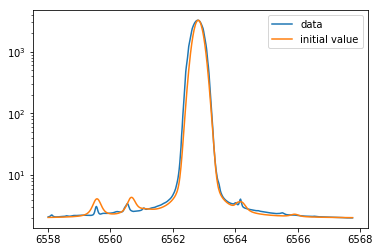

In [16]:
# Voigt Fitting for H alpha profile(1)!
# Cheking the initial values!

x0 = np.array([62.817, 59.580, 60.68, 61.097, 64.061, 64.206, 65.90]) +6500
line_name = np.array(['H alpha', 'Ti II', 'Si I', 'H2O', 'H2O', 'H2O', 'V I'])

offset = 2.0
peak = np.array([3233, 2.0, 2.0, 0.3, 0.3, 1, 0.2])
fwhm = np.array([0.22, 0.1, 0.1, 0.2, 0.05, 0.1, 0.1])
a = np.array([0.013, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0])

Kratio_Ha = Kratio(Ha.wv, offset, x0, peak, fwhm, a)

plt.plot(Ha.wv, kappa_Ha, label='data')
plt.plot(Ha.wv, Kratio_Ha, label='initial value')
plt.legend()
plt.yscale('log')
plt.show()

Ha 6563 with continuum intensity = 1.9500 +- 2.37e+00
Line Name Line Center  lc_err   shift   ... fwhm_err a_k(damping)  a_err  
            Angstrom  Angstrom Angstrom ... Angstrom                      
--------- ----------- -------- -------- ... -------- ------------ --------
  H alpha   6562.7957 6.22e-04  -0.0213 ... 2.86e-03       0.0100 1.30e-02
    Ti II   6559.5642 1.36e+00  -0.0158 ... 5.75e+00       0.0100 7.46e+01
     Si I   6560.5399 9.85e-01  -0.1401 ... 4.39e+00       0.0100 5.38e+01
      H2O   6561.0762 2.27e+00  -0.0208 ... 1.01e+01       0.0000 1.23e+02
      H2O   6563.9904 5.04e+00  -0.0706 ... 1.57e+01       0.0000 1.87e+02
      H2O   6564.1741 2.16e+00  -0.0319 ... 6.28e+00       0.0000 8.93e+01
      V I   6565.4801 4.89e+00  -0.0199 ... 2.08e+01       0.0100 2.52e+02
\begin{table}
\begin{tabular}{cccccccccc}
Line Name & Line Center & lc_err & shift & Peak & peak_err & FWHM & fwhm_err & a_k(damping) & a_err \\
$\mathrm{}$ & $\mathrm{\mathring{A}}$ & $\mathrm{\m

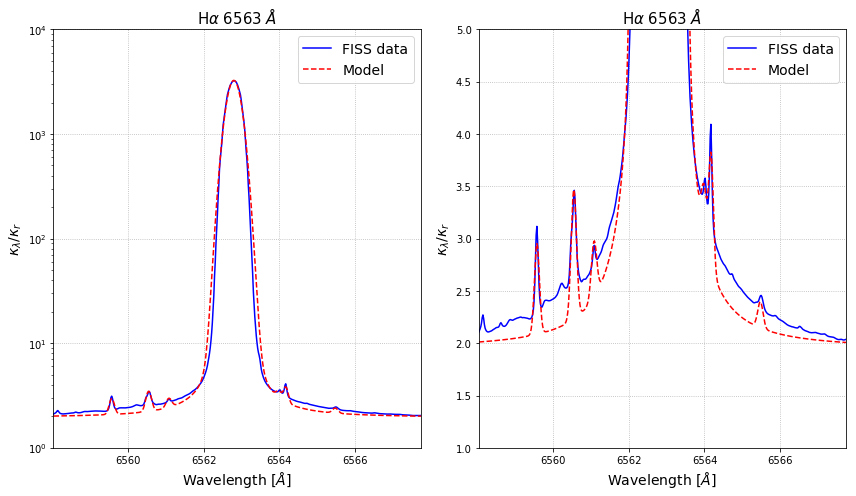

In [17]:
# Voigt Fitting for H alpha profile(2)!
# Take some boundaries!

x0 = np.array([62.817, 59.580, 60.68, 61.097, 64.061, 64.206, 65.50]) +6500
line_name = np.array(['H alpha', 'Ti II', 'Si I', 'H2O', 'H2O', 'H2O', 'V I'])

offset = 2.0
peak = np.array([3233, 2.0, 2.0, 0.3, 0.3, 1, 0.2])
fwhm = np.array([0.22, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05])
a = np.array([0.015, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005])

x = Ha.wv
y = kappa_Ha
initial_guess = np.array([offset,\
                          x0[0], x0[1], x0[2], x0[3], x0[4], x0[5], x0[6],\
                          peak[0], peak[1], peak[2], peak[3], peak[4], peak[5], peak[6],\
                          fwhm[0], fwhm[1], fwhm[2], fwhm[3], fwhm[4], fwhm[5], fwhm[6],\
                          a[0], a[1], a[2], a[3], a[4], a[5], a[6]])

bounds = np.array([0.05,\
                   0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,\
                   20, 2.0, 2.0, 0.3, 0.3, 0.5, 0.05,\
                   0.22, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,\
                   0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005])
    
bounds1 = initial_guess - bounds
bounds2 = initial_guess + bounds

popt_Ha, pcov_Ha = curve_fit(scalar_to_Kratio_Ha, x, y, bounds=[bounds1,bounds2])

# parameters table
para_name = ['Line Name', 'Line Center', 'lc_err', 'shift', 
             'Peak', 'peak_err', 'FWHM', 'fwhm_err', 'a_k(damping)', 'a_err']
para_unit = ['', 'AA', 'AA', 'AA', 
             '', '', 'AA', 'AA', '', '']

Ha_table = Table(data=[['' for j in range(len(line_name))] for i in range(len(para_name))], names=para_name)

n = len(line_name)
Ha_table['Line Name'] = line_name

Ha_table['Line Center'] = popt_Ha[1:1+n]
Ha_table['lc_err'] = np.sqrt(np.diag(pcov_Ha)[1:1+n])
Ha_table['shift'] = popt_Ha[1:1+n]-x0
                             
Ha_table['Peak'] = popt_Ha[1+n:1+2*n]
Ha_table['peak_err'] = np.sqrt(np.diag(pcov_Ha)[1+n:1+2*n])
                               
Ha_table['FWHM'] = popt_Ha[1+2*n:1+3*n]
Ha_table['fwhm_err'] = np.sqrt(np.diag(pcov_Ha)[1+2*n:1+3*n]) 
                               
Ha_table['a_k(damping)'] = popt_Ha[1+3*n:1+4*n]
Ha_table['a_err'] = np.sqrt(np.diag(pcov_Ha)[1+3*n:1+4*n])
                               
for i, name in enumerate(para_name):
    if i>0:
        Ha_table[name].format = '.4f'
    if 'err' in name:
        Ha_table[name].format = '.2e'
    Ha_table[name].unit = para_unit[i]

print('Ha 6563 with continuum intensity = {:.4f} +- {:.2e}'.format(popt_Ha[0], np.sqrt(pcov_Ha[0,0])))
print(Ha_table)
from astropy.io import ascii
ascii.write(Ha_table, format='latex')

# set figures
fig, ax = plt.subplots(1, 2, figsize=(12,7))
tsize = 15 #title size
fsize = 14 #font size

ax[0].plot(Ha.wv, kappa_Ha, 'b', label='FISS data')
ax[0].plot(Ha.wv, scalar_to_Kratio_Ha(Ha.wv, *popt_Ha), 'r--', label='Model')

ax[0].set_xlim(Ha.wv.min(), Ha.wv.max())
ax[0].set_ylim(1, 1e4)
ax[0].set_title(r'H$\alpha$ 6563 $\AA$', fontsize=tsize)
ax[0].set_xlabel(r'Wavelength [$\AA$]', fontsize=fsize)
ax[0].set_ylabel(r'$\kappa_\lambda/\kappa_r$', fontsize=fsize)
ax[0].set_yscale('log')
ax[0].legend(fontsize=fsize)
ax[0].grid(ls=':')

ax[1].plot(Ha.wv, kappa_Ha, 'b', label='FISS data')
ax[1].plot(Ha.wv, scalar_to_Kratio_Ha(Ha.wv, *popt_Ha), 'r--', label='Model')

ax[1].set_xlim(Ha.wv.min(), Ha.wv.max())
ax[1].set_ylim(1, 5)
ax[1].set_title(r'H$\alpha$ 6563 $\AA$', fontsize=tsize)
ax[1].set_xlabel(r'Wavelength [$\AA$]', fontsize=fsize)
ax[1].set_ylabel(r'$\kappa_\lambda/\kappa_r$', fontsize=fsize)
ax[1].legend(fontsize=fsize)
ax[1].grid(ls=':')

fig.tight_layout()
#plt.savefig('fittig_result_Ha.pdf', format='pdf', dpi=1000)
plt.show()

Ha 6563 with continuum intensity = 2.0500 +- 9.52e-03
Line Name Line Center  lc_err   shift   ... fwhm_err a_k(damping)  a_err  
            Angstrom  Angstrom Angstrom ... Angstrom                      
--------- ----------- -------- -------- ... -------- ------------ --------
  H alpha   6562.7999 7.85e-04  -0.0171 ... 6.04e-03       0.0153 5.45e-03
    Ti II   6559.5620 4.27e-03  -0.0180 ... 1.80e-02       0.0400 3.39e-01
     Si I   6560.5373 5.90e-03  -0.1427 ... 2.83e-02       0.0400 2.63e-01
      H2O   6561.0746 1.35e-02  -0.0224 ... 6.31e-02       0.0400 8.02e-01
      H2O   6564.0167 1.09e-02  -0.0443 ... 4.71e-02       0.0400 1.00e+00
      H2O   6564.1685 3.98e-03  -0.0375 ... 1.65e-02       0.0400 3.84e-01
      V I   6565.4805 2.20e-02  -0.4195 ... 9.42e-02       0.0400 1.15e+00
\begin{table}
\begin{tabular}{cccccccccc}
Line Name & Line Center & lc_err & shift & Peak & peak_err & FWHM & fwhm_err & a_k(damping) & a_err \\
$\mathrm{}$ & $\mathrm{\mathring{A}}$ & $\mathrm{\m

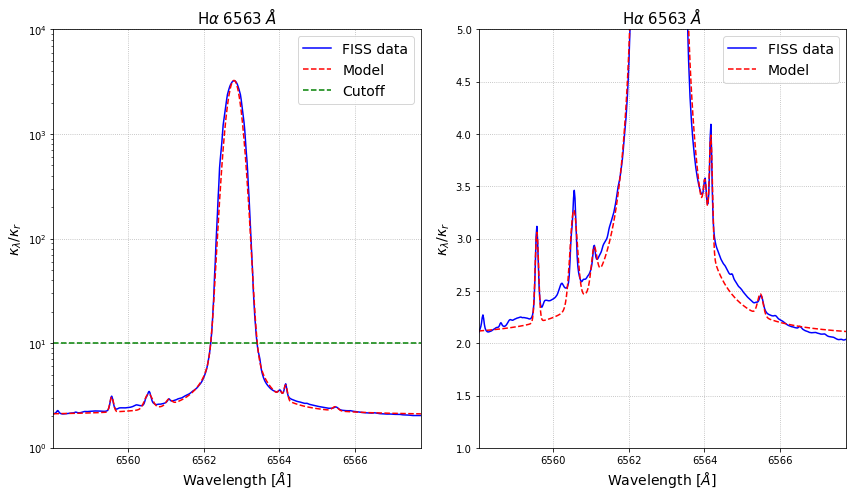

In [18]:
# Voigt Fitting for H alpha profile(3)!
# Take some boundaries!
# Set a region for fitting!

x0 = np.array([62.817, 59.580, 60.68, 61.097, 64.061, 64.206, 65.90]) +6500
line_name = np.array(['H alpha', 'Ti II', 'Si I', 'H2O', 'H2O', 'H2O', 'V I'])

offset = 2.0
peak = np.array([3233, 2.0, 2.0, 0.3, 0.3, 1, 0.2])
fwhm = np.array([0.3, 0.1, 0.1, 0.05, 0.05, 0.1, 0.05])
a = np.array([0.01, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02])

region = kappa_Ha<=10
x = Ha.wv[region]
y = kappa_Ha[region]
initial_guess = np.array([offset,\
                          x0[0], x0[1], x0[2], x0[3], x0[4], x0[5], x0[6],\
                          peak[0], peak[1], peak[2], peak[3], peak[4], peak[5], peak[6],\
                          fwhm[0], fwhm[1], fwhm[2], fwhm[3], fwhm[4], fwhm[5], fwhm[6],\
                          a[0], a[1], a[2], a[3], a[4], a[5], a[6]])

bounds = np.array([0.05,\
                   0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,\
                   20, 2.0, 2.0, 0.2, 0.2, 0.2, 0.2,\
                   0.3, 0.1, 0.1, 0.05, 0.05, 0.1, 0.05,\
                   0.01, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02])
    
bounds1 = initial_guess - bounds
bounds2 = initial_guess + bounds

popt_Ha, pcov_Ha = curve_fit(scalar_to_Kratio_Ha, x, y, bounds=[bounds1,bounds2])

# parameters table
para_name = ['Line Name', 'Line Center', 'lc_err', 'shift', 
             'Peak', 'peak_err', 'FWHM', 'fwhm_err', 'a_k(damping)', 'a_err']
para_unit = ['', 'AA', 'AA', 'AA',
             '', '', 'AA', 'AA', '', '']

Ha_table = Table(data=[['' for j in range(len(line_name))] for i in range(len(para_name))], names=para_name)

n = len(line_name)
Ha_table['Line Name'] = line_name

Ha_table['Line Center'] = popt_Ha[1:1+n]
Ha_table['lc_err'] = np.sqrt(np.diag(pcov_Ha)[1:1+n])
Ha_table['shift'] = popt_Ha[1:1+n] - x0
                             
Ha_table['Peak'] = popt_Ha[1+n:1+2*n]
Ha_table['peak_err'] = np.sqrt(np.diag(pcov_Ha)[1+n:1+2*n])
                               
Ha_table['FWHM'] = popt_Ha[1+2*n:1+3*n]
Ha_table['fwhm_err'] = np.sqrt(np.diag(pcov_Ha)[1+2*n:1+3*n]) 
                               
Ha_table['a_k(damping)'] = popt_Ha[1+3*n:1+4*n]
Ha_table['a_err'] = np.sqrt(np.diag(pcov_Ha)[1+3*n:1+4*n])
                               
for i, name in enumerate(para_name):
    if i>0:
        Ha_table[name].format = '.4f'
    if 'err' in name:
        Ha_table[name].format = '.2e'
    Ha_table[name].unit = para_unit[i]

print('Ha 6563 with continuum intensity = {:.4f} +- {:.2e}'.format(popt_Ha[0], np.sqrt(pcov_Ha[0,0])))
print(Ha_table)
from astropy.io import ascii
ascii.write(Ha_table, format='latex')

# set figures
fig, ax = plt.subplots(1, 2, figsize=(12,7))
tsize = 15 #title size
fsize = 14 #font size

ax[0].plot(Ha.wv, kappa_Ha, 'b', label='FISS data')
ax[0].plot(Ha.wv, scalar_to_Kratio_Ha(Ha.wv, *popt_Ha), 'r--', label='Model')
ax[0].plot(Ha.wv, 10*np.ones(len(Ha.wv)), 'g--', label='Cutoff')

ax[0].set_xlim(Ha.wv.min(), Ha.wv.max())
ax[0].set_ylim(1, 1e4)
ax[0].set_title(r'H$\alpha$ 6563 $\AA$', fontsize=tsize)
ax[0].set_xlabel(r'Wavelength [$\AA$]', fontsize=fsize)
ax[0].set_ylabel(r'$\kappa_\lambda/\kappa_r$', fontsize=fsize)
ax[0].set_yscale('log')
ax[0].legend(fontsize=fsize)
ax[0].grid(ls=':')

ax[1].plot(Ha.wv, kappa_Ha, 'b', label='FISS data')
ax[1].plot(Ha.wv, scalar_to_Kratio_Ha(Ha.wv, *popt_Ha), 'r--', label='Model')

ax[1].set_xlim(Ha.wv.min(), Ha.wv.max())
ax[1].set_ylim(1, 5)
ax[1].set_title(r'H$\alpha$ 6563 $\AA$', fontsize=tsize)
ax[1].set_xlabel(r'Wavelength [$\AA$]', fontsize=fsize)
ax[1].set_ylabel(r'$\kappa_\lambda/\kappa_r$', fontsize=fsize)
ax[1].legend(fontsize=fsize)
ax[1].grid(ls=':')

fig.tight_layout()
#plt.savefig('fittig_result_Ha_cutoff.pdf', format='pdf', dpi=1000)
plt.show()

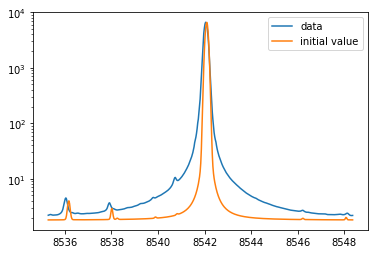

In [19]:
# Voigt Fitting for Ca II profile(1)!
# Cheking the initial values!

x0 = np.array([42.091, 36.165, 38.0152, 38.25, 39.888, 40.817, 46.222, 48.079]) + 8500
line_name = np.array(['Ca II', 'Si I', 'Fe I', 'CN', 'H2O', 'H2O', 'H2O', 'Ti I'])

offset = 1.8
peak = np.array([6570, 2.2, 1.1, 0.1, 0.1, 0.1, 0.1, 0.2])
fwhm = np.array([0.092, 0.07, 0.05, 0.05, 0.05, 0.05, 0.05, 0.04])
a = np.array([0.0225, 0.05, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

Kratio_Ca = Kratio(Ca.wv, offset, x0, peak, fwhm, a)

plt.plot(Ca.wv, kappa_Ca, label='data')
plt.plot(Ca.wv, Kratio_Ca, label='initial value')
plt.legend()
plt.yscale('log')
plt.show()

Ca 8542 with continuum intensity = 2.0500 +- 1.11e+00
Line Name Line Center  lc_err   shift   ... fwhm_err a_k(damping)  a_err  
            Angstrom  Angstrom Angstrom ... Angstrom                      
--------- ----------- -------- -------- ... -------- ------------ --------
    Ca II   8542.0521 1.24e-04  -0.0389 ... 5.38e-04       0.1221 5.81e-03
     Si I   8536.0374 3.58e-01  -0.1276 ... 1.52e+00       0.0600 1.70e+01
     Fe I   8537.9088 8.00e-01  -0.1064 ... 3.28e+00       0.1050 4.43e+01
       CN   8538.1611 2.60e+00  -0.0889 ... 1.07e+01       0.1050 1.44e+02
      H2O   8539.8818 4.69e-01  -0.0062 ... 2.02e+00       0.1050 2.47e+01
      H2O   8540.7299 1.46e-01  -0.0871 ... 6.28e-01       0.1050 7.70e+00
      H2O   8546.1996 2.59e+00  -0.0224 ... 1.11e+01       0.1050 1.37e+02
     Ti I   8548.1210 3.77e+00   0.0420 ... 1.63e+01       0.1050 2.87e+02
\begin{table}
\begin{tabular}{cccccccccc}
Line Name & Line Center & lc_err & shift & Peak & peak_err & FWHM & fwhm_err & 

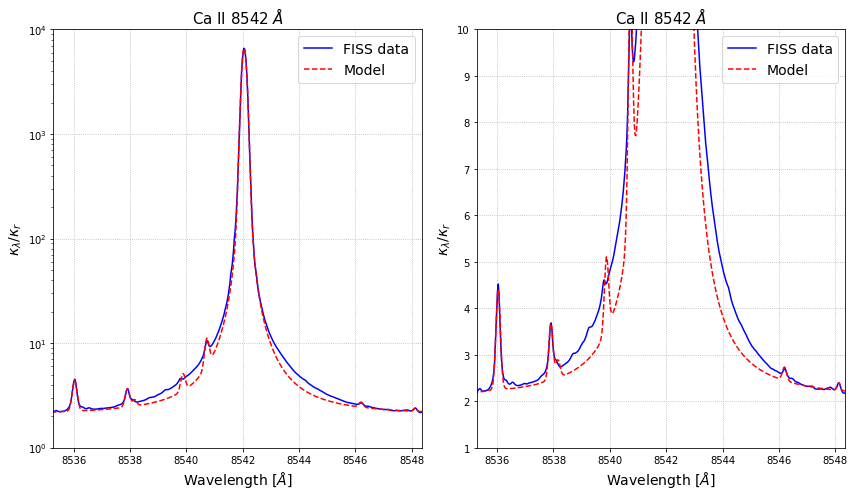

In [20]:
# Voigt Fitting for Ca II profile(2)!
# Take some boundaries!

x0 = np.array([42.091, 36.165, 38.0152, 38.25, 39.888, 40.817, 46.222, 48.079]) + 8500
line_name = np.array(['Ca II', 'Si I', 'Fe I', 'CN', 'H2O', 'H2O', 'H2O', 'Ti I'])

offset = 2.0
peak = np.array([6570, 2.2, 1.1, 0.5, 1.0, 3.0, 0.2, 0.2])
fwhm = np.array([0.092, 0.07, 0.05, 0.05, 0.05, 0.05, 0.05, 0.04])
a = np.array([0.1, 0.05, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

x = Ca.wv
y = kappa_Ca
initial_guess = np.array([offset,\
                          x0[0], x0[1], x0[2], x0[3], x0[4], x0[5], x0[6], x0[7],\
                          peak[0], peak[1], peak[2], peak[3], peak[4], peak[5], peak[6], peak[7],\
                          fwhm[0], fwhm[1], fwhm[2], fwhm[3], fwhm[4], fwhm[5], fwhm[6], fwhm[7],\
                          a[0], a[1], a[2], a[3], a[4], a[5], a[6], a[7]])

bounds = np.array([0.05,\
                   0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,\
                   20, 2.0, 2.0, 0.5, 1.0, 3.0, 0.2, 0.2,\
                   0.22, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,\
                   0.1, 0.01, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005])
    
bounds1 = initial_guess - bounds
bounds2 = initial_guess + bounds

popt_Ca, pcov_Ca = curve_fit(scalar_to_Kratio_Ca, x, y, bounds=[bounds1,bounds2])

# parameters table
para_name = ['Line Name', 'Line Center', 'lc_err', 'shift',
             'Peak', 'peak_err', 'FWHM', 'fwhm_err', 'a_k(damping)', 'a_err']
para_unit = ['', 'AA', 'AA', 'AA',
             '', '', 'AA', 'AA', '', '']

Ca_table = Table(data=[['' for j in range(len(line_name))] for i in range(len(para_name))], names=para_name)

n = len(line_name)
Ca_table['Line Name'] = line_name

Ca_table['Line Center'] = popt_Ca[1:1+n]
Ca_table['lc_err'] = np.sqrt(np.diag(pcov_Ca)[1:1+n])
Ca_table['shift'] = popt_Ca[1:1+n] - x0
                             
Ca_table['Peak'] = popt_Ca[1+n:1+2*n]
Ca_table['peak_err'] = np.sqrt(np.diag(pcov_Ca)[1+n:1+2*n])
                               
Ca_table['FWHM'] = popt_Ca[1+2*n:1+3*n]
Ca_table['fwhm_err'] = np.sqrt(np.diag(pcov_Ca)[1+2*n:1+3*n]) 
                               
Ca_table['a_k(damping)'] = popt_Ca[1+3*n:1+4*n]
Ca_table['a_err'] = np.sqrt(np.diag(pcov_Ca)[1+3*n:1+4*n])
                               
for i, name in enumerate(para_name):
    if i>0:
        Ca_table[name].format = '.4f'
    if 'err' in name:
        Ca_table[name].format = '.2e'
    Ca_table[name].unit = para_unit[i]

print('Ca 8542 with continuum intensity = {:.4f} +- {:.2e}'.format(popt_Ca[0], np.sqrt(pcov_Ca[0,0])))
print(Ca_table)
from astropy.io import ascii
ascii.write(Ca_table, format='latex')

# set figures
fig, ax = plt.subplots(1, 2, figsize=(12,7))
tsize = 15 #title size
fsize = 14 #font size

ax[0].plot(Ca.wv, kappa_Ca, 'b', label='FISS data')
ax[0].plot(Ca.wv, scalar_to_Kratio_Ca(Ca.wv, *popt_Ca), 'r--', label='Model')

ax[0].set_xlim(Ca.wv.min(), Ca.wv.max())
ax[0].set_ylim(1, 1e4)
ax[0].set_title(r'Ca II 8542 $\AA$', fontsize=tsize)
ax[0].set_xlabel(r'Wavelength [$\AA$]', fontsize=fsize)
ax[0].set_ylabel(r'$\kappa_\lambda/\kappa_r$', fontsize=fsize)
ax[0].set_yscale('log')
ax[0].legend(fontsize=fsize)
ax[0].grid(ls=':')

ax[1].plot(Ca.wv, kappa_Ca, 'b', label='FISS data')
ax[1].plot(Ca.wv, scalar_to_Kratio_Ca(Ca.wv, *popt_Ca), 'r--', label='Model')

ax[1].set_xlim(Ca.wv.min(), Ca.wv.max())
ax[1].set_ylim(1, 10)
ax[1].set_title(r'Ca II 8542 $\AA$', fontsize=tsize)
ax[1].set_xlabel(r'Wavelength [$\AA$]', fontsize=fsize)
ax[1].set_ylabel(r'$\kappa_\lambda/\kappa_r$', fontsize=fsize)
ax[1].legend(fontsize=fsize)
ax[1].grid(ls=':')

fig.tight_layout()
#plt.savefig('fittig_result_Ca.pdf', format='pdf', dpi=1000)
plt.show()

Ca 8542 with continuum intensity = 2.0500 +- 3.70e-02
Line Name Line Center  lc_err   shift   ... fwhm_err a_k(damping)  a_err  
            Angstrom  Angstrom Angstrom ... Angstrom                      
--------- ----------- -------- -------- ... -------- ------------ --------
    Ca II   8542.0376 2.17e-03  -0.0534 ... 5.46e+02       8.5761 9.92e+05
     Si I   8536.0373 7.17e-03  -0.1277 ... 3.39e-02       0.4000 5.80e-01
     Fe I   8537.6197 4.16e-01  -0.3955 ... 2.13e+00       0.3814 5.28e+01
       CN   8537.9152 1.88e-02  -0.3348 ... 9.50e-02       0.4000 1.49e+00
      H2O   8539.8201 1.79e-02  -0.0679 ... 8.59e-02       0.4000 1.16e+00
      H2O   8540.7145 5.71e-03  -0.1025 ... 3.03e-02       0.4000 4.30e-01
      H2O   8546.5339 1.70e+04   0.3119 ... 3.19e+04       0.0059 0.00e+00
     Ti I   8548.5754 3.10e+07   0.4964 ... 2.38e+06       0.0015 6.20e+06
\begin{table}
\begin{tabular}{cccccccccc}
Line Name & Line Center & lc_err & shift & Peak & peak_err & FWHM & fwhm_err & 

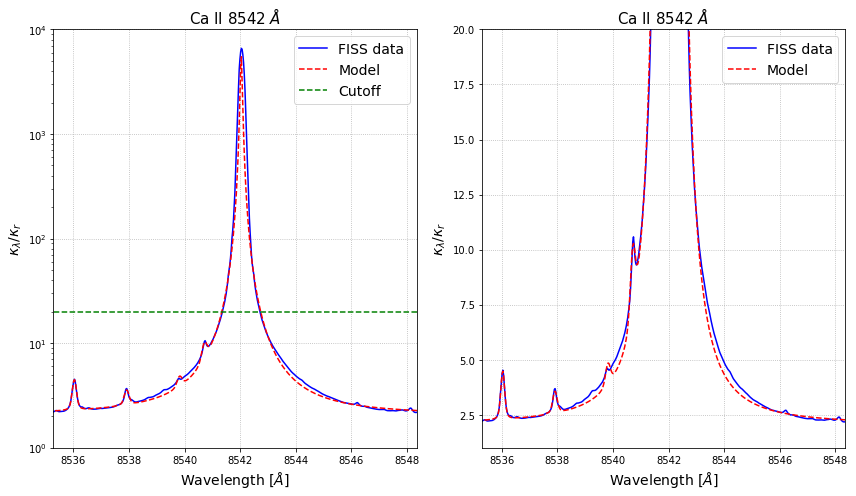

In [21]:
# Voigt Fitting for Ca II profile(3)!
# Take some boundaries!
# Set a region for fitting!

x0 = np.array([42.091, 36.165, 38.0152, 38.25, 39.888, 40.817, 46.222, 48.079]) + 8500
line_name = np.array(['Ca II', 'Si I', 'Fe I', 'CN', 'H2O', 'H2O', 'H2O', 'Ti I'])

offset = 2.0
peak = np.array([6570, 2.2, 1.1, 0.5, 1.0, 3.0, 0.2, 0.2])
fwhm = np.array([5.0, 0.07, 0.05, 0.05, 0.05, 0.05, 0.05, 0.04])
a = np.array([5.0, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2])

region = kappa_Ca<20
x = Ca.wv[region]
y = kappa_Ca[region]
initial_guess = np.array([offset,\
                          x0[0], x0[1], x0[2], x0[3], x0[4], x0[5], x0[6], x0[7],\
                          peak[0], peak[1], peak[2], peak[3], peak[4], peak[5], peak[6], peak[7],\
                          fwhm[0], fwhm[1], fwhm[2], fwhm[3], fwhm[4], fwhm[5], fwhm[6], fwhm[7],\
                          a[0], a[1], a[2], a[3], a[4], a[5], a[6], a[7]])

bounds = np.array([0.05,\
                   0.5, 0.5, 0.5, 0.5, 0.2, 0.5, 0.5, 0.5,\
                   1000, 2.0, 2.0, 0.5, 1.0, 3.0, 0.2, 0.2,\
                   5.0, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,\
                   5.0, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2])

bounds1 = initial_guess - bounds
bounds2 = initial_guess + bounds

popt_Ca, pcov_Ca = curve_fit(scalar_to_Kratio_Ca, x, y, bounds=[bounds1,bounds2])

# parameters table
para_name = ['Line Name', 'Line Center', 'lc_err', 'shift',
             'Peak', 'peak_err', 'FWHM', 'fwhm_err', 'a_k(damping)', 'a_err']
para_unit = ['', 'AA', 'AA', 'AA',
             '', '', 'AA', 'AA', '', '']

Ca_table = Table(data=[['' for j in range(len(line_name))] for i in range(len(para_name))], names=para_name)

n = len(line_name)
Ca_table['Line Name'] = line_name

Ca_table['Line Center'] = popt_Ca[1:1+n]
Ca_table['lc_err'] = np.sqrt(np.diag(pcov_Ca)[1:1+n])
Ca_table['shift'] = popt_Ca[1:1+n] - x0
                             
Ca_table['Peak'] = popt_Ca[1+n:1+2*n]
Ca_table['peak_err'] = np.sqrt(np.diag(pcov_Ca)[1+n:1+2*n])
                               
Ca_table['FWHM'] = popt_Ca[1+2*n:1+3*n]
Ca_table['fwhm_err'] = np.sqrt(np.diag(pcov_Ca)[1+2*n:1+3*n]) 
                               
Ca_table['a_k(damping)'] = popt_Ca[1+3*n:1+4*n]
Ca_table['a_err'] = np.sqrt(np.diag(pcov_Ca)[1+3*n:1+4*n])
                               
for i, name in enumerate(para_name):
    if i>0:
        Ca_table[name].format = '.4f'
    if 'err' in name:
        Ca_table[name].format = '.2e'
    Ca_table[name].unit = para_unit[i]

print('Ca 8542 with continuum intensity = {:.4f} +- {:.2e}'.format(popt_Ca[0], np.sqrt(pcov_Ca[0,0])))
print(Ca_table)
from astropy.io import ascii
ascii.write(Ca_table, format='latex')

# set figures
fig, ax = plt.subplots(1, 2, figsize=(12,7))
tsize = 15 #title size
fsize = 14 #font size

ax[0].plot(Ca.wv, kappa_Ca, 'b', label='FISS data')
ax[0].plot(Ca.wv, scalar_to_Kratio_Ca(Ca.wv, *popt_Ca), 'r--', label='Model')
ax[0].plot(Ca.wv, 20*np.ones(len(Ca.wv)), 'g--', label='Cutoff')

ax[0].set_xlim(Ca.wv.min(), Ca.wv.max())
ax[0].set_ylim(1, 1e4)
ax[0].set_title(r'Ca II 8542 $\AA$', fontsize=tsize)
ax[0].set_xlabel(r'Wavelength [$\AA$]', fontsize=fsize)
ax[0].set_ylabel(r'$\kappa_\lambda/\kappa_r$', fontsize=fsize)
ax[0].set_yscale('log')
ax[0].legend(fontsize=fsize)
ax[0].grid(ls=':')

ax[1].plot(Ca.wv, kappa_Ca, 'b', label='FISS data')
ax[1].plot(Ca.wv, scalar_to_Kratio_Ca(Ca.wv, *popt_Ca), 'r--', label='Model')

ax[1].set_xlim(Ca.wv.min(), Ca.wv.max())
ax[1].set_ylim(1, 20)
ax[1].set_title(r'Ca II 8542 $\AA$', fontsize=tsize)
ax[1].set_xlabel(r'Wavelength [$\AA$]', fontsize=fsize)
ax[1].set_ylabel(r'$\kappa_\lambda/\kappa_r$', fontsize=fsize)
ax[1].legend(fontsize=fsize)
ax[1].grid(ls=':')

fig.tight_layout()
#plt.savefig('fittig_result_Ca_cutoff.pdf', format='pdf', dpi=1000)
plt.show()

Topic 3 : Understanding the Formation of the Spectra in a Bright Point
===

# Objectives
---
To understand how the spectra depend on the structure of the atmosphere. 

# Principles
---
Bright points appear brighter than the average quiet atmosphere at many wavelengths. The contrast is the highest in the inner wings of the H$\alpha$ line and the Ca II line. Why does a bright point look different from the average atmosphere? To find an answer, we think of two hypotheses.

1. **It is because bright points are hotter.** This effect can be modelled by multiplying $T$ by a constant factor $c$ greater than 1.
2. **It is because bright points are evacuated.** The structure of temperature given as a function of height is the same as the average atmosphere. But the spectral formation region of a bright point is located lower and hotter than that of the average quiet atmosphere because the bright point is optically more transparent than the average atmosphere.
The effect of evacuation can be modeled by decreasing the absorption coefficient or choosing the deeper region of the average atmospheric model $\tau_\lambda = c$ or $\tau_r = c\tau_\lambda$ for with $c > 1$.

# Procedures
---
The following procedures can be taken for either of the H$\alpha$ band data set and the Ca II
band data set.

* Run `demo.py` and compare the spectral profiles between the average quiet atmosphere and the bright point at (87,60).

In [22]:
# Set for comparing the spectral lines!

# calculate the lambdameter(doppler shift)
hw_Ha = 0.5
hw_Ca = 0.2
shiftHa, intenHa = Ha.lambdaMeter(hw_Ha, wvRange=[Ha.wvRef - 1.2, Ha.wvRef + 1.2])
shiftCa, intenCa = Ca.lambdaMeter(hw_Ca, wvRange=[Ca.wvRef - 1.2, Ca.wvRef + 1.2])

# get raster images
rasterHa = Ha.getRaster(Ha.wvRef + np.array([0, 0.6, 1, 4.5]))
rasterCa = Ca.getRaster(Ca.wvRef + np.array([0, 0.6, 2, 5.5]))

# list of bright points position
BP_list = np.array([[85, 88, 132, 233, 153, 185, 67, 114, 72, 106, 101, 18],
                    [60, 100, 76, 26, 102, 130, 38, 172, 152, 145, 142, 112]])
BP_list = BP_list.transpose()

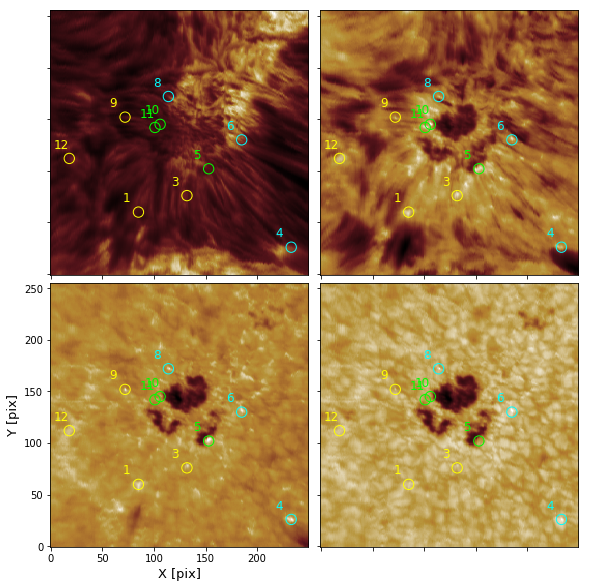

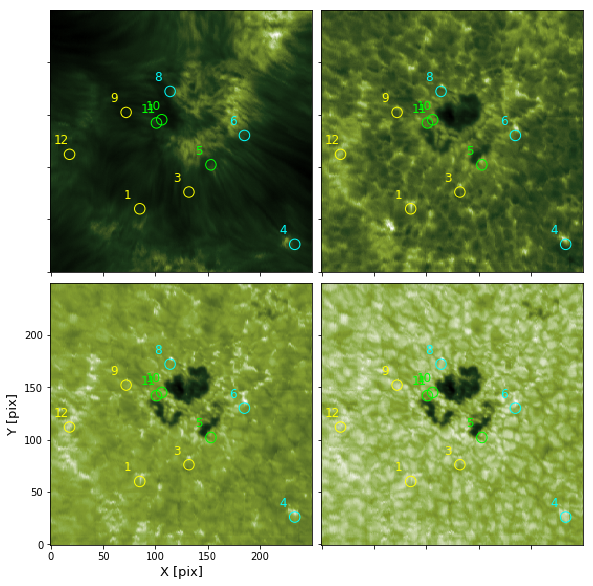

In [55]:
# Display the H alpha, Ca II raster images!

# Bright Point classification
BP_class = [[4,6,8],[1,9,3,12],[5,10,11]]

# set figures of H alpha
figRasterHa, axRasterHa = plt.subplots(2, 2, sharex= True, sharey= True, figsize= [8,8])
fsize = 12 #font size
csize = 5  #circle size
color = ['cyan', 'yellow', 'lime']

axRasterHa[0,0].imshow(Ha.raster[0], Ha.cm, origin= 'lower')
axRasterHa[0,1].imshow(Ha.raster[1], Ha.cm, origin= 'lower')
axRasterHa[1,0].imshow(Ha.raster[2], Ha.cm, origin= 'lower')
axRasterHa[1,1].imshow(Ha.raster[3], Ha.cm, origin= 'lower')

axRasterHa[0,0].tick_params(labelleft=False)
axRasterHa[1,1].tick_params(labelbottom=False)
axRasterHa[1,0].set_xlabel('X [pix]', fontsize=13)
axRasterHa[1,0].set_ylabel('Y [pix]', fontsize=13)
    
for i in range(2):
    for axi in axRasterHa[i]:
        for c in range(len(color)):
            for j in BP_class[c]:
                BP = BP_list[j-1,:]
                circle = plt.Circle(BP, csize, color=color[c], fill=False)
                axi.add_artist(circle)
                axi.text(BP[0]-15, BP[1]+10, '{:d}'.format(j), color=color[c], fontsize=fsize)

figRasterHa.tight_layout(pad=0.1)
#plt.savefig('raster_Ha.pdf', format='pdf', dpi=1000)
    
#Dislpay the Ca raster images
figRasterCa, axRasterCa = plt.subplots(2, 2, sharex= True, sharey= True, figsize= [8,8])

axRasterCa[0,0].imshow(Ca.raster[0], Ca.cm, origin= 'lower')
axRasterCa[0,1].imshow(Ca.raster[1], Ca.cm, origin= 'lower')
axRasterCa[1,0].imshow(Ca.raster[2], Ca.cm, origin= 'lower')
axRasterCa[1,1].imshow(Ca.raster[3], Ca.cm, origin= 'lower')

axRasterCa[0,0].tick_params(labelleft=False)
axRasterCa[1,1].tick_params(labelbottom=False)
axRasterCa[1,0].set_xlabel('X [pix]', fontsize=13)
axRasterCa[1,0].set_ylabel('Y [pix]', fontsize=13)
    
for i in range(2):
    for axi in axRasterCa[i]:
        for c in range(len(color)):
            for j in BP_class[c]:
                BP = BP_list[j-1,:]
                circle = plt.Circle(BP, csize, color=color[c], fill=False)
                axi.add_artist(circle)
                axi.text(BP[0]-15, BP[1]+10, '{}'.format(j), color=color[c], fontsize=fsize)

figRasterCa.tight_layout(pad=0.1)
#plt.savefig('raster_Ca.pdf', format='pdf', dpi=1000)

1-th Bright Point at (85,60)


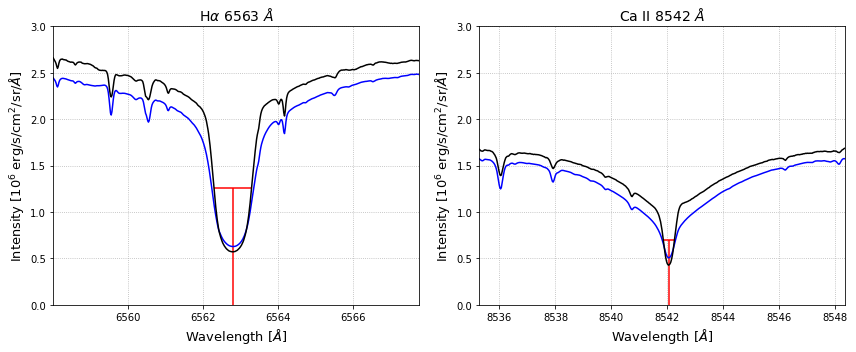

In [61]:
# Compare the spectral profiles between bright points and avg quiet atmosphere!

# set figures
delx = 1
dely = 5
    
for index, value in enumerate(BP_list):
    x = value[0]
    y = value[1]
    print('{}-th Bright Point at ({},{})'.format(index+1, x, y))

    fig, ax = plt.subplots(1, 2, figsize=(12,5))
    tsize = 14 #title size
    fsize = 13 #font size
    
    # display H alpha profile
    ax[0].plot(Ha.wv, k_Ha*Ha.refProfile, 'b')
    ax[0].plot(Ha.wv, k_Ha*Ha.frame[y,x], 'k')
    ax[0].hlines(k_Ha*intenHa[y,x], shiftHa[y,x] - hw_Ha,
                          shiftHa[y,x] + hw_Ha, 'r')
    ax[0].vlines(shiftHa[y,x], 0, k_Ha*intenHa[y,x], 'r')
    
    ax[0].set_xlabel(r'Wavelength [$\AA$]', fontsize=fsize)
    ax[0].set_ylabel(r'Intensity [$10^{6}$ erg/s/cm$^{2}$/sr/$\AA$]', fontsize=fsize)
    ax[0].set_title(r'H$\alpha$ 6563 $\AA$', fontsize=tsize)
    ax[0].set_xlim(Ha.wv.min(), Ha.wv.max())
    ax[0].set_ylim(0, 3)
    ax[0].grid(ls=':')
    
    # display Ca II Profile
    ax[1].plot(Ca.wv, k_Ca*Ca.refProfile, 'b')
    ax[1].plot(Ca.wv, k_Ca*Ca.frame[y+dely,x+delx], 'k')
    ax[1].hlines(k_Ca*intenCa[y+dely,x+delx],shiftCa[y+dely,x+delx] - hw_Ca, shiftCa[y+dely,x+delx] + hw_Ca, 'r')
    ax[1].vlines(shiftCa[y+dely,x+delx], 0, k_Ca*intenCa[y+dely,x+delx], 'r')
    
    ax[1].set_xlabel(r'Wavelength [$\AA$]', fontsize=fsize)
    ax[1].set_ylabel(r'Intensity [$10^{6}$ erg/s/cm$^{2}$/sr/$\AA$]', fontsize=fsize)
    ax[1].set_title(r'Ca II 8542 $\AA$', fontsize=tsize)
    ax[1].set_xlim(Ca.wv.min(), Ca.wv.max())
    ax[1].set_ylim(0, 3)
    ax[1].grid(ls=':')
    
    fig.tight_layout()
    #plt.savefig('Profile_BP_({},{}).pdf'.format(x,y), format='pdf', dpi=1000)
    plt.show()
    break

core 부분에서 average quiet atmosphere 보다 intensity 가 낮지만 그 이외의 부분에서는 intenstiy 가 높다. 

* Use the results obtained for the average quiet atmosphere from the previous topic: $T_1(\lambda)$ and $\tau_r(\lambda)$.
* Test of the first hypothesis.
    1. Guess a value of $c$.
    2. Calculate $B_\lambda(cT_1(\lambda))$ and compare it with the observed profile of the bright point.
    3. Repeat the above processes until the best agreement is obtained.

1-th Bright Point at (85,60)


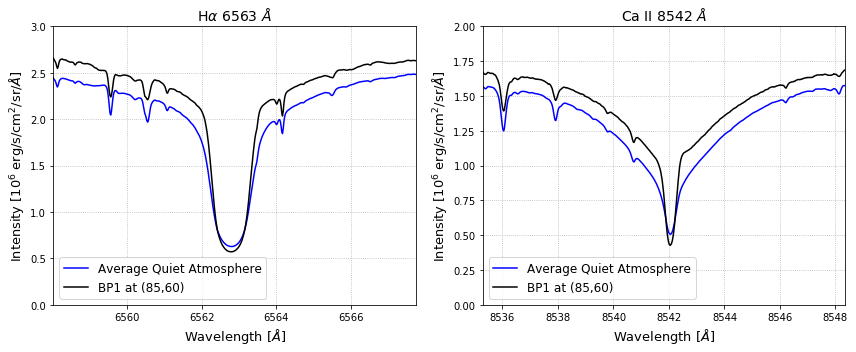

2-th Bright Point at (88,100)


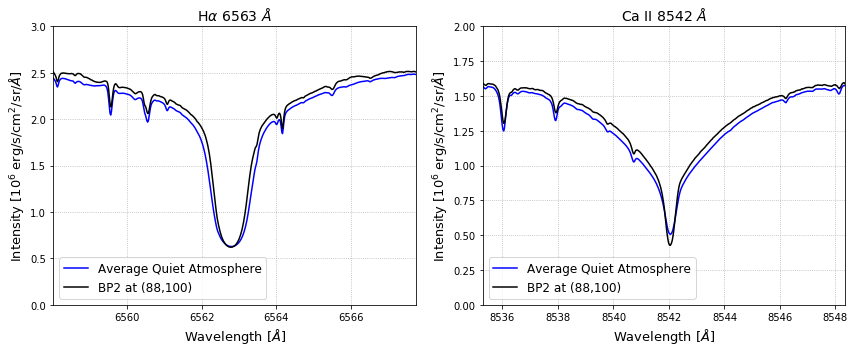

3-th Bright Point at (132,76)


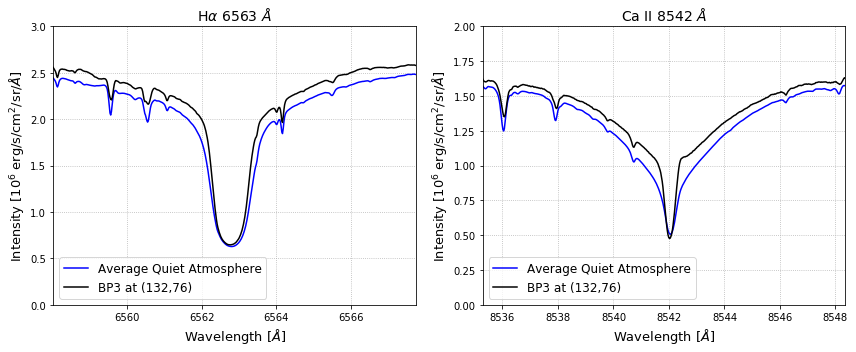

4-th Bright Point at (233,26)


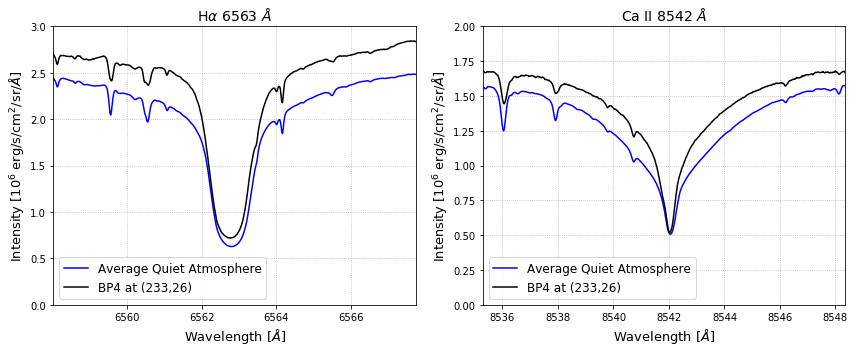

5-th Bright Point at (153,102)


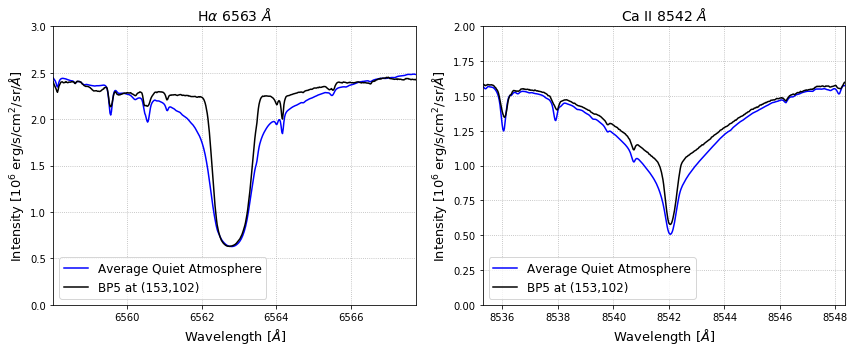

6-th Bright Point at (185,130)


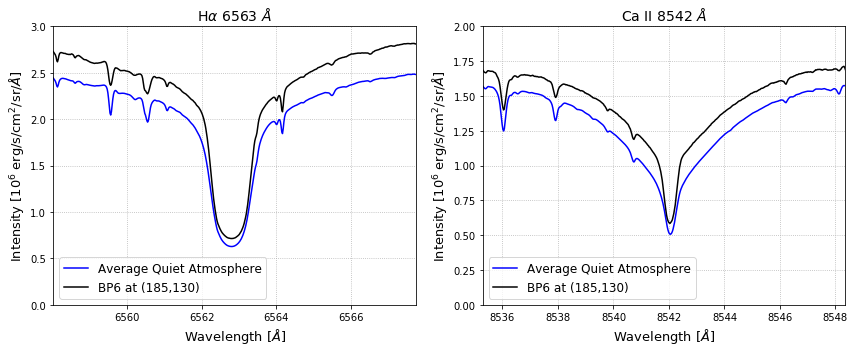

7-th Bright Point at (67,38)


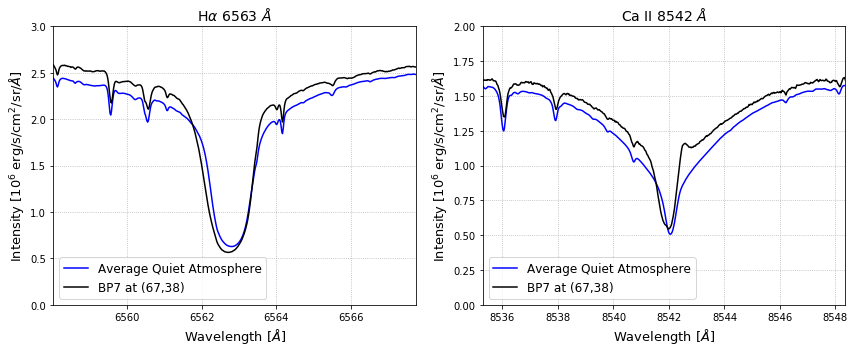

8-th Bright Point at (114,172)


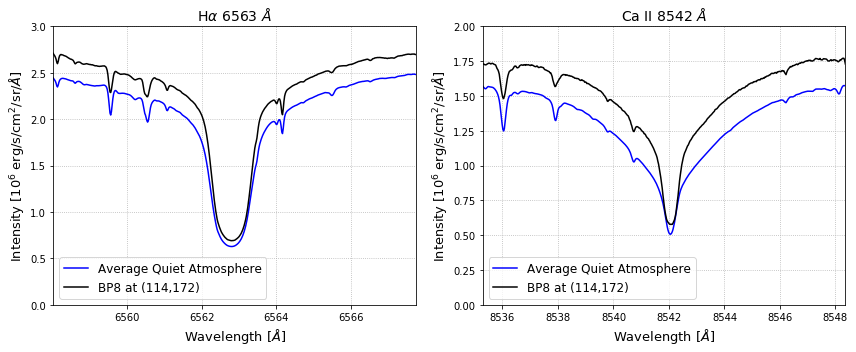

9-th Bright Point at (72,152)


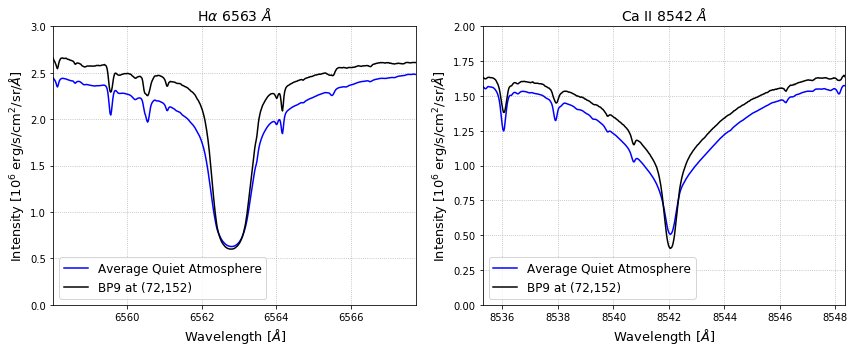

10-th Bright Point at (106,145)


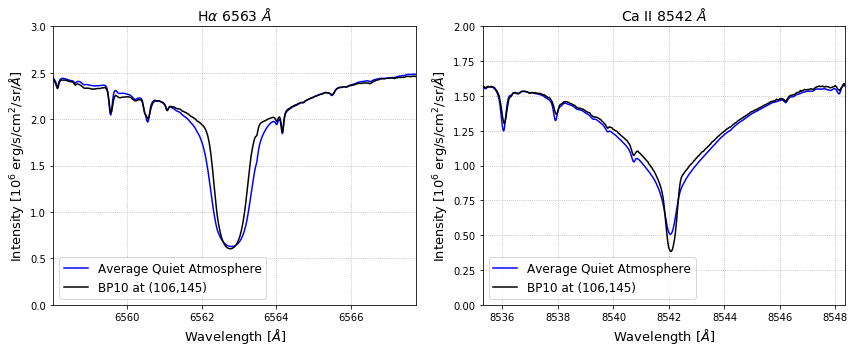

11-th Bright Point at (101,142)


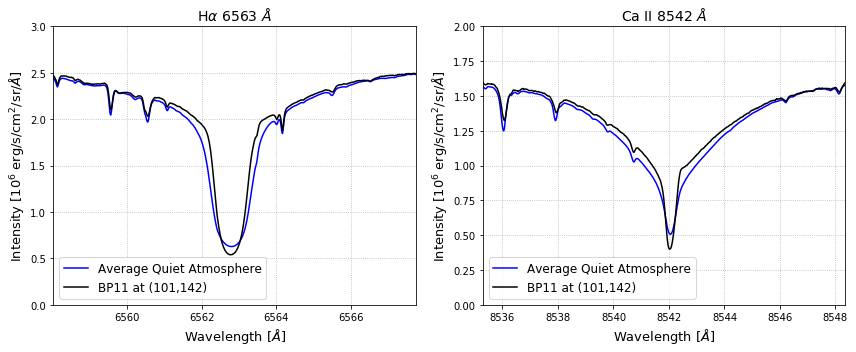

12-th Bright Point at (18,112)


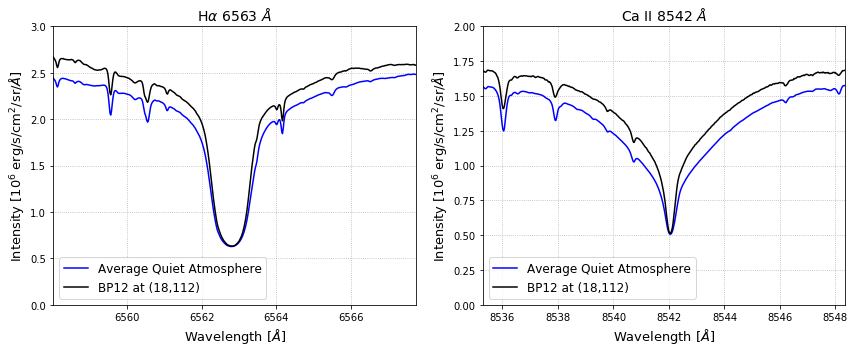

In [68]:
# Verify the first hypothesis!

# function which multiply const. p to temperature
def B1(wv, T, p):
    I=[]
    c = 2.998*1e+10   #Speed of light [cm/s]
    h = 6.626*1e-27   #Planck constant [erg*s]
    k = 1.381*1e-16   #Boltzmann constant [erg/K]
    const1 = 2*h*c**2*1e-14
    const2 = h*c/k
    
    for i in range(len(wv)):
        wv_cm = wv[i]*1e-8
        I.append(const1/wv_cm**5/(np.exp(const2/(p*T[i])/wv_cm)-1))
    return np.asarray(I)

p = [1.02, 1.02, 1.02, 1.02, 1.02, 1.02, 1.02, 1.02, 1.02, 1.02, 1.02, 1.02]
for index, value in enumerate(BP_list):
    x = value[0]
    y = value[1]
    
    I1_Ha = B1(Ha.wv, T1_Ha, p[index])
    I1_Ca = B1(Ca.wv, T1_Ca, p[index])

    print('{}-th Bright Point at ({},{})'.format(index+1, x, y))

    fig, ax = plt.subplots(1, 2, figsize=(12,5))
    tsize = 14 #title size
    fsize = 13 #font size
    
    # display H alpha profile
    ax[0].plot(Ha.wv, k_Ha*Ha.refProfile, 'b', label='Average Quiet Atmosphere')
    ax[0].plot(Ha.wv, k_Ha*Ha.frame[y,x], 'k', label='BP{} at ({},{})'.format(index+1,x,y))
    #ax[0].plot(Ha.wv, I1_Ha, 'r:')
    
    ax[0].set_xlabel(r'Wavelength [$\AA$]', fontsize=fsize)
    ax[0].set_ylabel(r'Intensity [$10^{6}$ erg/s/cm$^{2}$/sr/$\AA$]', fontsize=fsize)
    ax[0].set_title(r'H$\alpha$ 6563 $\AA$', fontsize=tsize)
    ax[0].set_xlim(Ha.wv.min(), Ha.wv.max())
    ax[0].set_ylim(0, 3)
    ax[0].grid(ls=':')
    ax[0].legend(fontsize=12, loc=3)
    
    # display Ca II Profile
    ax[1].plot(Ca.wv, k_Ca*Ca.refProfile, 'b', label='Average Quiet Atmosphere')
    ax[1].plot(Ca.wv, k_Ca*Ca.frame[y+dely,x+delx], 'k', label='BP{} at ({},{})'.format(index+1,x,y))
    #ax[1].plot(Ca.wv, I1_Ca, 'r:')
    
    ax[1].set_xlabel(r'Wavelength [$\AA$]', fontsize=fsize)
    ax[1].set_ylabel(r'Intensity [$10^{6}$ erg/s/cm$^{2}$/sr/$\AA$]', fontsize=fsize)
    ax[1].set_title(r'Ca II 8542 $\AA$', fontsize=tsize)
    ax[1].set_xlim(Ca.wv.min(), Ca.wv.max())
    ax[1].set_ylim(0, 2)
    ax[1].grid(ls=':')
    ax[1].legend(fontsize=12, loc=3)
    
    fig.tight_layout()
    #plt.savefig('Profile_BP_({},{}).pdf'.format(x,y), format='pdf', dpi=1000)
    plt.show()

* Test of the second hypothesis.
    1. Guess a value of $c$.
    2. Determine the temperature of the formation region using the relation $T^*_1(\lambda) = T(c\tau_r(\lambda))$ where $T(t_r)$ is the run of temperature in the average quiet atmosphere.
    3. Calculate $B_\lambda(T^*_1(\lambda))$ and compare it with the observed profile of the bright point.
    4. Repeat the above processes until the best agreement is obtained.

1-th Bright Point at (85,60)


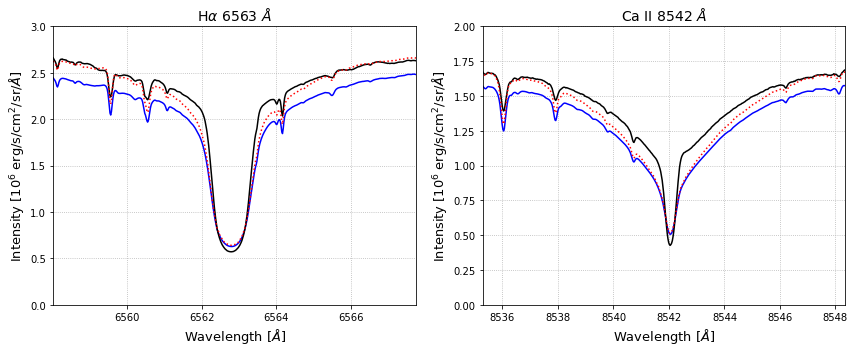

In [52]:
# Verify the second hypothesis!

# function which multiply const. p to ref. optical depth
def B2(wv, tau, p):
    I=[]
    c = 2.998*1e+10   #Speed of light [cm/s]
    h = 6.626*1e-27   #Planck constant [erg*s]
    k = 1.381*1e-16   #Boltzmann constant [erg/K]
    const1 = 2*h*c**2*1e-14
    const2 = h*c/k
    
    for i in range(len(wv)):
        wv_cm = wv[i]*1e-8
        T = interpolation(temp_extpol1(HEIGHTS), TAU_500, p*tau[i])
        I.append(const1/wv_cm**5/(np.exp(const2/T/wv_cm)-1))
    return np.asarray(I)

for index, value in enumerate(BP_list):
    x = value[0]
    y = value[1]
    
    p = 1.15
    I2_Ha = B2(Ha.wv, taur_Ha, p)
    I2_Ca = B2(Ca.wv, taur_Ca, p)

    print('{}-th Bright Point at ({},{})'.format(index+1, x, y))

    fig, ax = plt.subplots(1, 2, figsize=(12,5))
    tsize = 14 #title size
    fsize = 13 #font size
    
    # display H alpha profile
    ax[0].plot(Ha.wv, k_Ha*Ha.refProfile, 'b')
    ax[0].plot(Ha.wv, k_Ha*Ha.frame[y,x], 'k')
    ax[0].plot(Ha.wv, I2_Ha, 'r:')
    
    ax[0].set_xlabel(r'Wavelength [$\AA$]', fontsize=fsize)
    ax[0].set_ylabel(r'Intensity [$10^{6}$ erg/s/cm$^{2}$/sr/$\AA$]', fontsize=fsize)
    ax[0].set_title(r'H$\alpha$ 6563 $\AA$', fontsize=tsize)
    ax[0].set_xlim(Ha.wv.min(), Ha.wv.max())
    ax[0].set_ylim(0, 3)
    ax[0].grid(ls=':')
    
    # display Ca II Profile
    ax[1].plot(Ca.wv, k_Ca*Ca.refProfile, 'b')
    ax[1].plot(Ca.wv, k_Ca*Ca.frame[y+dely,x+delx], 'k')
    ax[1].plot(Ca.wv, I2_Ca, 'r:')
    
    ax[1].set_xlabel(r'Wavelength [$\AA$]', fontsize=fsize)
    ax[1].set_ylabel(r'Intensity [$10^{6}$ erg/s/cm$^{2}$/sr/$\AA$]', fontsize=fsize)
    ax[1].set_title(r'Ca II 8542 $\AA$', fontsize=tsize)
    ax[1].set_xlim(Ca.wv.min(), Ca.wv.max())
    ax[1].set_ylim(0, 2)
    ax[1].grid(ls=':')
    
    fig.tight_layout()
    #plt.savefig('Profile_BP_({},{}).pdf'.format(x,y), format='pdf', dpi=1000)
    plt.show()
    break

* Based on the results, discuss together how the difference between the two spectral profiles can be understood.

4-th Bright Point at (233,26)
For H alpha, p = 1.0360209915905472 +- 6.932445767442544e-08, 
For Ca II, p = 1.0158151407946894 +- 6.858744183355496e-08


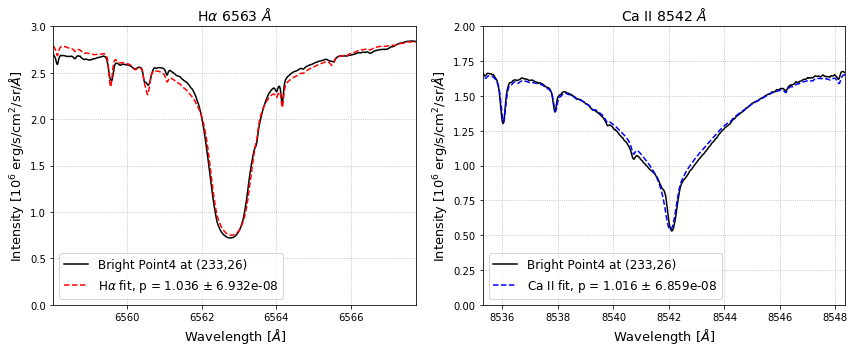

6-th Bright Point at (185,130)
For H alpha, p = 1.0316605045999272 +- 2.7595382566087037e-08, 
For Ca II, p = 0.9990300220217889 +- 2.8291680813690624e-08


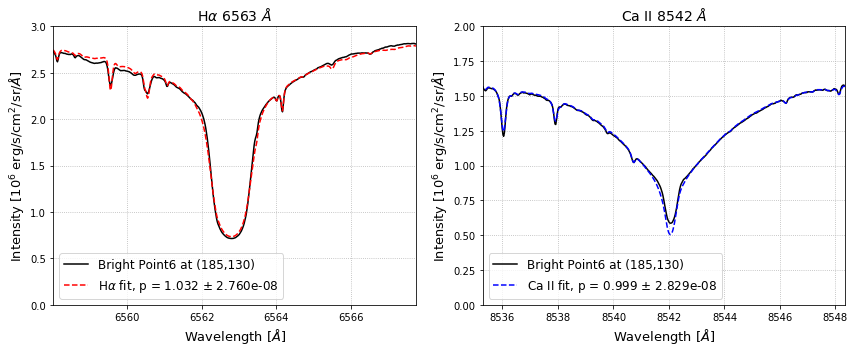

8-th Bright Point at (114,172)
For H alpha, p = 1.025644143545652 +- 2.7497891414047162e-08, 
For Ca II, p = 1.0077239072995805 +- 7.532676686042128e-08


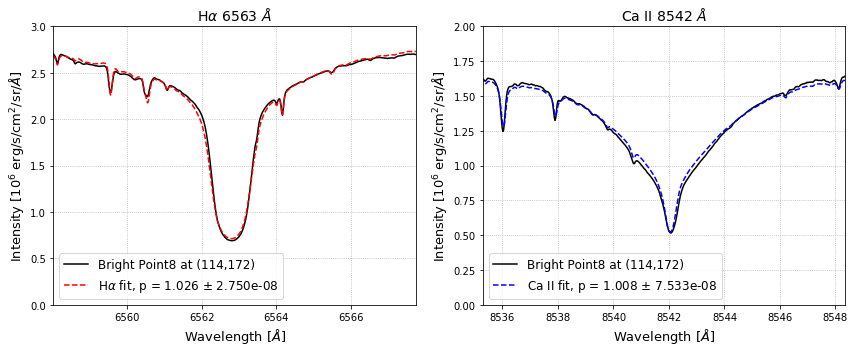

In [57]:
# Find the fittest value p for the hypothesis 1!
from scipy.optimize import curve_fit

def fit1(X, p):
    wv, T = X
    I=[]
    c = 2.998*1e+10   #Speed of light [cm/s]
    h = 6.626*1e-27   #Planck constant [erg*s]
    k = 1.381*1e-16   #Boltzmann constant [erg/K]
    const1 = 2*h*c**2*1e-14
    const2 = h*c/k
    
    for i in range(len(wv)):
        wv_cm = wv[i]*1e-8
        I.append(const1/wv_cm**5/(np.exp(const2/(p*T[i])/wv_cm)-1))
    return np.asarray(I)

for index in BP_class[0]:
    x, y = BP_list[index-1,:]
    print('{}-th Bright Point at ({},{})'.format(index, x, y))

    popt_Ha, pcov_Ha = curve_fit(fit1, (Ha.wv, T1_Ha), k_Ha*Ha.frame[y,x], p0=1)
    popt_Ca, pcov_Ca = curve_fit(fit1, (Ca.wv, T1_Ca), k_Ca*Ca.frame[y,x], p0=1)
    print('For H alpha, p = {} +- {}, '.format(popt_Ha[0], pcov_Ha[0,0]))
    print('For Ca II, p = {} +- {}'.format(popt_Ca[0], pcov_Ca[0,0]))

    I1_Ha_popt_Ha = fit1((Ha.wv, T1_Ha), popt_Ha[0])
    I1_Ha_popt_Ca = B1(Ha.wv, T1_Ha, popt_Ca[0])
    I1_Ca_popt_Ha = B1(Ca.wv, T1_Ca, popt_Ha[0])
    I1_Ca_popt_Ca = B1(Ca.wv, T1_Ca, popt_Ca[0])
    
    # set figures
    fig, ax = plt.subplots(1, 2, figsize=(12,5))
    tsize = 14 #title size
    fsize = 13 #font size
    
    # display H alpha profile
    ax[0].plot(Ha.wv, k_Ha*Ha.frame[y,x], 'k', label='Bright Point{} at ({},{})'.format(index,x,y))
    ax[0].plot(Ha.wv, I1_Ha_popt_Ha, 'r--', label=r'H$\alpha$ fit, p = {:.3f} $\pm$ {:.3e}'.format(popt_Ha[0], pcov_Ha[0,0]))
    
    ax[0].set_xlabel(r'Wavelength [$\AA$]', fontsize=fsize)
    ax[0].set_ylabel(r'Intensity [$10^{6}$ erg/s/cm$^{2}$/sr/$\AA$]', fontsize=fsize)
    ax[0].set_title(r'H$\alpha$ 6563 $\AA$', fontsize=tsize)
    ax[0].set_xlim(Ha.wv.min(), Ha.wv.max())
    ax[0].set_ylim(0, 3)
    ax[0].legend(fontsize=12, loc=3)
    ax[0].grid(ls=':')
    
    # display Ca II Profile
    ax[1].plot(Ca.wv, k_Ca*Ca.frame[y,x], 'k', label='Bright Point{} at ({},{})'.format(index,x,y))
    ax[1].plot(Ca.wv, I1_Ca_popt_Ca, 'b--', label='Ca II fit, p = {:.3f} $\pm$ {:.3e}'.format(popt_Ca[0], pcov_Ca[0,0]))
    
    ax[1].set_xlabel(r'Wavelength [$\AA$]', fontsize=fsize)
    ax[1].set_ylabel(r'Intensity [$10^{6}$ erg/s/cm$^{2}$/sr/$\AA$]', fontsize=fsize)
    ax[1].set_title(r'Ca II 8542 $\AA$', fontsize=tsize)
    ax[1].set_xlim(Ca.wv.min(), Ca.wv.max())
    ax[1].set_ylim(0, 2)
    ax[1].legend(fontsize=12, loc=3)
    ax[1].grid(ls=':')
    
    fig.tight_layout()
    #plt.savefig('Fit1_Profile_BP{}_({},{}).pdf'.format(index,x,y), format='pdf', dpi=1000)
    plt.show()

1-th Bright Point at (85,60)
For H alpha, p = 1.1894758758539188 +- 1.75767161407328e-05, 
For Ca II, p = 1.0983533482627694 +- 2.617906793324104e-05


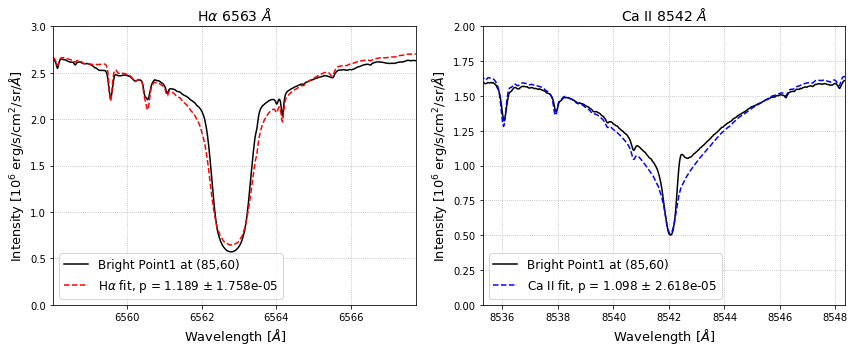

9-th Bright Point at (72,152)
For H alpha, p = 1.2151989971879267 +- 2.3207104326165447e-05, 
For Ca II, p = 1.150291218309576 +- 1.7180469478863684e-05


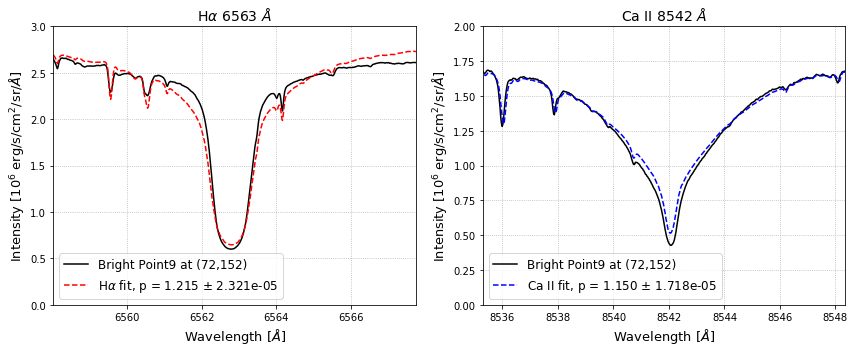

3-th Bright Point at (132,76)
For H alpha, p = 1.1173596190955162 +- 1.3161848572441816e-05, 
For Ca II, p = 0.9298950243620816 +- 2.2311438603023403e-06


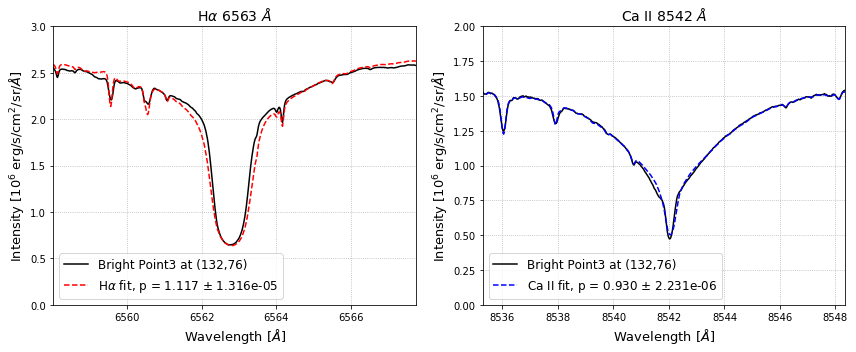

12-th Bright Point at (18,112)
For H alpha, p = 1.160474606416982 +- 7.96615931259301e-06, 
For Ca II, p = 1.2456314913039837 +- 4.566247260854265e-05


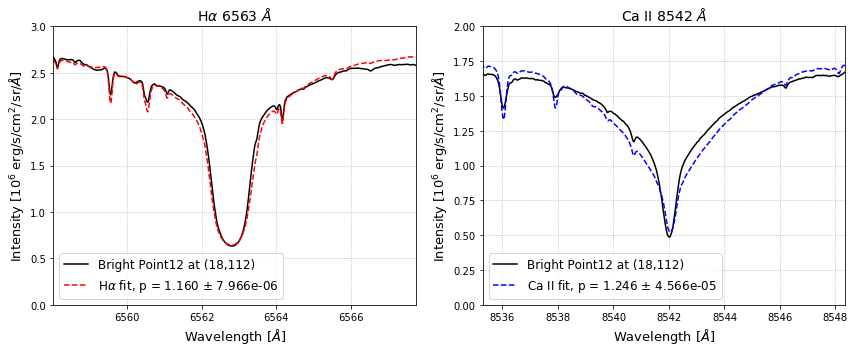

In [72]:
# Find the fittest value p for the hypothesis 2!
from scipy.optimize import curve_fit

def fit2(X, p):
    wv, tau = X
    I=[]
    c = 2.998*1e+10   #Speed of light [cm/s]
    h = 6.626*1e-27   #Planck constant [erg*s]
    k = 1.381*1e-16   #Boltzmann constant [erg/K]
    const1 = 2*h*c**2*1e-14
    const2 = h*c/k
    
    for i in range(len(wv)):
        wv_cm = wv[i]*1e-8
        T = interpolation(temp_extpol1(HEIGHTS), TAU_500, p*tau[i])
        I.append(const1/wv_cm**5/(np.exp(const2/T/wv_cm)-1))
    return np.asarray(I)

for index in BP_class[1]:
    x, y = BP_list[index-1,:]
    print('{}-th Bright Point at ({},{})'.format(index, x, y))

    popt_Ha, pcov_Ha = curve_fit(fit2, (Ha.wv, taur_Ha), k_Ha*Ha.frame[y,x], p0=1)
    popt_Ca, pcov_Ca = curve_fit(fit2, (Ca.wv, taur_Ca), k_Ca*Ca.frame[y,x], p0=1)
    print('For H alpha, p = {} +- {}, '.format(popt_Ha[0], pcov_Ha[0,0]))
    print('For Ca II, p = {} +- {}'.format(popt_Ca[0], pcov_Ca[0,0]))

    I1_Ha_popt_Ha = B2(Ha.wv, taur_Ha, popt_Ha[0])
    I1_Ha_popt_Ca = B2(Ha.wv, taur_Ha, popt_Ca[0])
    I1_Ca_popt_Ha = B2(Ca.wv, taur_Ca, popt_Ha[0])
    I1_Ca_popt_Ca = B2(Ca.wv, taur_Ca, popt_Ca[0])
    
    # set figures
    fig, ax = plt.subplots(1, 2, figsize=(12,5))
    tsize = 14 #title size
    fsize = 13 #font size
    
    # display H alpha profile
    ax[0].plot(Ha.wv, k_Ha*Ha.frame[y,x], 'k', label='Bright Point{} at ({},{})'.format(index,x,y))
    ax[0].plot(Ha.wv, I1_Ha_popt_Ha, 'r--', label=r'H$\alpha$ fit, p = {:.3f} $\pm$ {:.3e}'.format(popt_Ha[0], pcov_Ha[0,0]))
    
    ax[0].set_xlabel(r'Wavelength [$\AA$]', fontsize=fsize)
    ax[0].set_ylabel(r'Intensity [$10^{6}$ erg/s/cm$^{2}$/sr/$\AA$]', fontsize=fsize)
    ax[0].set_title(r'H$\alpha$ 6563 $\AA$', fontsize=tsize)
    ax[0].set_xlim(Ha.wv.min(), Ha.wv.max())
    ax[0].set_ylim(0, 3)
    ax[0].legend(fontsize=12, loc=3)
    ax[0].grid(ls=':')
    
    # display Ca II Profile
    ax[1].plot(Ca.wv, k_Ca*Ca.frame[y,x], 'k', label='Bright Point{} at ({},{})'.format(index,x,y))
    ax[1].plot(Ca.wv, I1_Ca_popt_Ca, 'b--', label='Ca II fit, p = {:.3f} $\pm$ {:.3e}'.format(popt_Ca[0], pcov_Ca[0,0]))
    
    ax[1].set_xlabel(r'Wavelength [$\AA$]', fontsize=fsize)
    ax[1].set_ylabel(r'Intensity [$10^{6}$ erg/s/cm$^{2}$/sr/$\AA$]', fontsize=fsize)
    ax[1].set_title(r'Ca II 8542 $\AA$', fontsize=tsize)
    ax[1].set_xlim(Ca.wv.min(), Ca.wv.max())
    ax[1].set_ylim(0, 2)
    ax[1].legend(fontsize=12, loc=3)
    ax[1].grid(ls=':')
    
    fig.tight_layout()
    #plt.savefig('Fit2_Profile_BP{}_({},{}).pdf'.format(index,x,y), format='pdf', dpi=1000)
    plt.show()

In [ ]:
for index, value in enumerate(BP_list):
    x, y = value
    print('{}-th Bright Point at ({},{})'.format(index+1, x, y))

    popt_Ha, pcov_Ha = curve_fit(fit1, (Ha.wv, T1_Ha), k_Ha*Ha.frame[y,x], p0=1)
    popt_Ca, pcov_Ca = curve_fit(fit1, (Ca.wv, T1_Ca), k_Ca*Ca.frame[y,x], p0=1)
    print('For H alpha, p = {} +- {}, '.format(popt_Ha[0], pcov_Ha[0,0]))
    print('For Ca II, p = {} +- {}'.format(popt_Ca[0], pcov_Ca[0,0]))

    I1_Ha_popt_Ha = fit1((Ha.wv, T1_Ha), popt_Ha[0])
    I1_Ha_popt_Ca = B1(Ha.wv, T1_Ha, popt_Ca[0])
    I1_Ca_popt_Ha = B1(Ca.wv, T1_Ca, popt_Ha[0])
    I1_Ca_popt_Ca = B1(Ca.wv, T1_Ca, popt_Ca[0])
    
    # set figures
    fig, ax = plt.subplots(1, 2, figsize=(12,5))
    tsize = 14 #title size
    fsize = 13 #font size
    
    # display H alpha profile
    ax[0].plot(Ha.wv, k_Ha*Ha.frame[y,x], 'k', label='Bright Point at ({},{})'.format(x,y))
    ax[0].plot(Ha.wv, I1_Ha_popt_Ha, 'r', label=r'H$\alpha$ fit, p = {:.3f} $\pm$ {:.3e}'.format(popt_Ha[0], np.sqrt(pcov_Ha[0,0])))
    ax[0].plot(Ha.wv, k_Ha*Ha.refProfile, 'b', label='Quiet Atmosphere')
    
    ax[0].set_xlabel(r'Wavelength [$\AA$]', fontsize=fsize)
    ax[0].set_ylabel(r'Intensity [$10^{6}$ erg/s/cm$^{2}$/sr/$\AA$]', fontsize=fsize)
    ax[0].set_title(r'H$\alpha$ 6563 $\AA$', fontsize=tsize)
    ax[0].set_xlim(Ha.wv.min(), Ha.wv.max())
    ax[0].set_ylim(0, 3)
    ax[0].legend(fontsize=12, loc=3)
    ax[0].grid(ls=':')
    
    # display Ca II Profile
    ax[1].plot(Ca.wv, k_Ca*Ca.frame[y,x], 'k', label='Bright Point at ({},{})'.format(x,y))
    ax[1].plot(Ca.wv, I1_Ca_popt_Ca, 'r', label='Ca II fit, p = {:.3f} $\pm$ {:.3e}'.format(popt_Ca[0], np.sqrt(pcov_Ca[0,0])))
    ax[1].plot(Ca.wv, k_Ca*Ca.refProfile, 'b', label='Quiet Atmosphere')
    
    ax[1].set_xlabel(r'Wavelength [$\AA$]', fontsize=fsize)
    ax[1].set_ylabel(r'Intensity [$10^{6}$ erg/s/cm$^{2}$/sr/$\AA$]', fontsize=fsize)
    ax[1].set_title(r'Ca II 8542 $\AA$', fontsize=tsize)
    ax[1].set_xlim(Ca.wv.min(), Ca.wv.max())
    ax[1].set_ylim(0, 2)
    ax[1].legend(fontsize=12, loc=3)
    ax[1].grid(ls=':')
    
    fig.tight_layout()
    #plt.savefig('Fit1_C_Profile_BP_({},{}).pdf'.format(x,y), format='pdf', dpi=1000)
    plt.show()
    
    break

In [ ]:
for index, value in enumerate(BP_list):
    x, y = value
    print('{}-th Bright Point at ({},{})'.format(index+1, x, y))

    popt_Ha, pcov_Ha = curve_fit(fit2, (Ha.wv, taur_Ha), k_Ha*Ha.frame[y,x], p0=1)
    popt_Ca, pcov_Ca = curve_fit(fit2, (Ca.wv, taur_Ca), k_Ca*Ca.frame[y,x], p0=1)
    print('For H alpha, p = {} +- {}, '.format(popt_Ha[0], pcov_Ha[0,0]))
    print('For Ca II, p = {} +- {}'.format(popt_Ca[0], pcov_Ca[0,0]))

    I1_Ha_popt_Ha = B2(Ha.wv, taur_Ha, popt_Ha[0])
    I1_Ha_popt_Ca = B2(Ha.wv, taur_Ha, popt_Ca[0])
    I1_Ca_popt_Ha = B2(Ca.wv, taur_Ca, popt_Ha[0])
    I1_Ca_popt_Ca = B2(Ca.wv, taur_Ca, popt_Ca[0])
    
    # set figures
    fig, ax = plt.subplots(1, 2, figsize=(12,5))
    tsize = 14 #title size
    fsize = 13 #font size
    
    # display H alpha profile
    ax[0].plot(Ha.wv, k_Ha*Ha.frame[y,x], 'k', label='Bright Point at ({},{})'.format(x,y))
    ax[0].plot(Ha.wv, I1_Ha_popt_Ha, 'r', label=r'H$\alpha$ fit, p = {:.3f} $\pm$ {:.3e}'.format(popt_Ha[0], np.sqrt(pcov_Ha[0,0])))
    ax[0].plot(Ha.wv, k_Ha*Ha.refProfile, 'b', label='Quiet Atmosphere')
    
    ax[0].set_xlabel(r'Wavelength [$\AA$]', fontsize=fsize)
    ax[0].set_ylabel(r'Intensity [$10^{6}$ erg/s/cm$^{2}$/sr/$\AA$]', fontsize=fsize)
    ax[0].set_title(r'H$\alpha$ 6563 $\AA$', fontsize=tsize)
    ax[0].set_xlim(Ha.wv.min(), Ha.wv.max())
    ax[0].set_ylim(0, 3)
    ax[0].legend(fontsize=12, loc=3)
    ax[0].grid(ls=':')
    
    # display Ca II Profile
    ax[1].plot(Ca.wv, k_Ca*Ca.frame[y,x], 'k', label='Bright Point at ({},{})'.format(x,y))
    ax[1].plot(Ca.wv, I1_Ca_popt_Ca, 'r', label='Ca II fit, p = {:.3f} $\pm$ {:.3e}'.format(popt_Ca[0], np.sqrt(pcov_Ca[0,0])))
    ax[1].plot(Ca.wv, k_Ca*Ca.refProfile, 'b', label='Quiet Atmosphere')
    
    ax[1].set_xlabel(r'Wavelength [$\AA$]', fontsize=fsize)
    ax[1].set_ylabel(r'Intensity [$10^{6}$ erg/s/cm$^{2}$/sr/$\AA$]', fontsize=fsize)
    ax[1].set_title(r'Ca II 8542 $\AA$', fontsize=tsize)
    ax[1].set_xlim(Ca.wv.min(), Ca.wv.max())
    ax[1].set_ylim(0, 2)
    ax[1].legend(fontsize=12, loc=3)
    ax[1].grid(ls=':')
    
    fig.tight_layout()
    #plt.savefig('Fit2_C_Profile_BP_({},{}).pdf'.format(x,y), format='pdf', dpi=1000)
    plt.show()
    
    break

In [ ]:
fig, ax = plt.subplots(figsize=(7,5))
wv = [5000, 6563, 8542]
k = [1, 1.92, 1.80]

ax.plot(wv, k, 'r^-', markersize=10)
ax.plot([8206,8206],[0,2],'b--')

ax.set_xlabel(r'Wavelength [$\AA$]', fontsize=13)
ax.set_ylabel('Relative absorption coefficient', fontsize=13)
ax.set_ylim(0,2)
ax.grid(ls=':')

#plt.savefig('1.pdf', dpi=1000)
plt.show()

5-th Bright Point at (153,102)
For H alpha, p = 1.0094118803185748 +- 5.835291234416317e-07, 
For Ca II, p = 0.9971991831404334 +- 5.11688575785658e-07


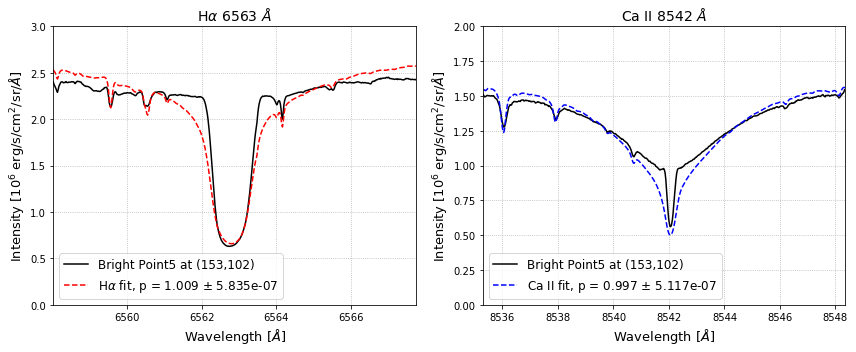

In [75]:
# Find the fittest value p for the hypothesis 1!
from scipy.optimize import curve_fit

def fit1(X, p):
    wv, T = X
    I=[]
    c = 2.998*1e+10   #Speed of light [cm/s]
    h = 6.626*1e-27   #Planck constant [erg*s]
    k = 1.381*1e-16   #Boltzmann constant [erg/K]
    const1 = 2*h*c**2*1e-14
    const2 = h*c/k
    
    for i in range(len(wv)):
        wv_cm = wv[i]*1e-8
        I.append(const1/wv_cm**5/(np.exp(const2/(p*T[i])/wv_cm)-1))
    return np.asarray(I)

for index in BP_class[2]:
    x, y = BP_list[index-1,:]
    print('{}-th Bright Point at ({},{})'.format(index, x, y))

    popt_Ha, pcov_Ha = curve_fit(fit1, (Ha.wv, T1_Ha), k_Ha*Ha.frame[y,x], p0=1)
    popt_Ca, pcov_Ca = curve_fit(fit1, (Ca.wv, T1_Ca), k_Ca*Ca.frame[y,x], p0=1)
    print('For H alpha, p = {} +- {}, '.format(popt_Ha[0], pcov_Ha[0,0]))
    print('For Ca II, p = {} +- {}'.format(popt_Ca[0], pcov_Ca[0,0]))

    I1_Ha_popt_Ha = fit1((Ha.wv, T1_Ha), popt_Ha[0])
    I1_Ha_popt_Ca = B1(Ha.wv, T1_Ha, popt_Ca[0])
    I1_Ca_popt_Ha = B1(Ca.wv, T1_Ca, popt_Ha[0])
    I1_Ca_popt_Ca = B1(Ca.wv, T1_Ca, popt_Ca[0])
    
    # set figures
    fig, ax = plt.subplots(1, 2, figsize=(12,5))
    tsize = 14 #title size
    fsize = 13 #font size
    
    # display H alpha profile
    ax[0].plot(Ha.wv, k_Ha*Ha.frame[y,x], 'k', label='Bright Point{} at ({},{})'.format(index,x,y))
    ax[0].plot(Ha.wv, I1_Ha_popt_Ha, 'r--', label=r'H$\alpha$ fit, p = {:.3f} $\pm$ {:.3e}'.format(popt_Ha[0], pcov_Ha[0,0]))
    
    ax[0].set_xlabel(r'Wavelength [$\AA$]', fontsize=fsize)
    ax[0].set_ylabel(r'Intensity [$10^{6}$ erg/s/cm$^{2}$/sr/$\AA$]', fontsize=fsize)
    ax[0].set_title(r'H$\alpha$ 6563 $\AA$', fontsize=tsize)
    ax[0].set_xlim(Ha.wv.min(), Ha.wv.max())
    ax[0].set_ylim(0, 3)
    ax[0].legend(fontsize=12, loc=3)
    ax[0].grid(ls=':')
    
    # display Ca II Profile
    ax[1].plot(Ca.wv, k_Ca*Ca.frame[y,x], 'k', label='Bright Point{} at ({},{})'.format(index,x,y))
    ax[1].plot(Ca.wv, I1_Ca_popt_Ca, 'b--', label='Ca II fit, p = {:.3f} $\pm$ {:.3e}'.format(popt_Ca[0], pcov_Ca[0,0]))
    
    ax[1].set_xlabel(r'Wavelength [$\AA$]', fontsize=fsize)
    ax[1].set_ylabel(r'Intensity [$10^{6}$ erg/s/cm$^{2}$/sr/$\AA$]', fontsize=fsize)
    ax[1].set_title(r'Ca II 8542 $\AA$', fontsize=tsize)
    ax[1].set_xlim(Ca.wv.min(), Ca.wv.max())
    ax[1].set_ylim(0, 2)
    ax[1].legend(fontsize=12, loc=3)
    ax[1].grid(ls=':')
    
    fig.tight_layout()
    #plt.savefig('Fit1_Profile_BP{}_({},{}).pdf'.format(index,x,y), format='pdf', dpi=1000)
    plt.show()
    break

5-th Bright Point at (153,102)
For H alpha, p = 1.0533105493175376 +- 4.624021304986594e-05, 
For Ca II, p = 0.9415051160067157 +- 4.1940466484116385e-05


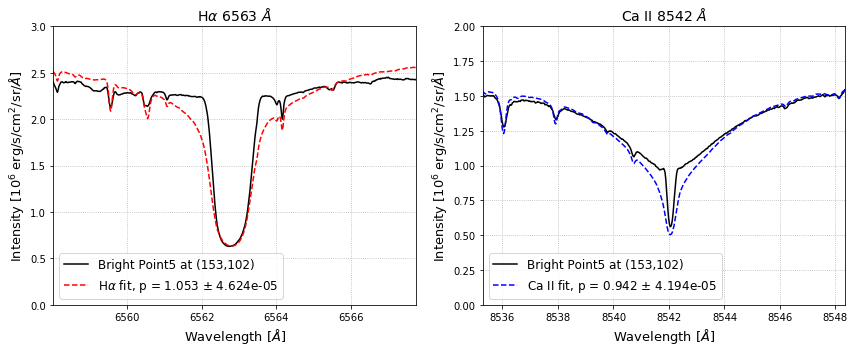

In [76]:
# Find the fittest value p for the hypothesis 2!
from scipy.optimize import curve_fit

def fit2(X, p):
    wv, tau = X
    I=[]
    c = 2.998*1e+10   #Speed of light [cm/s]
    h = 6.626*1e-27   #Planck constant [erg*s]
    k = 1.381*1e-16   #Boltzmann constant [erg/K]
    const1 = 2*h*c**2*1e-14
    const2 = h*c/k
    
    for i in range(len(wv)):
        wv_cm = wv[i]*1e-8
        T = interpolation(temp_extpol1(HEIGHTS), TAU_500, p*tau[i])
        I.append(const1/wv_cm**5/(np.exp(const2/T/wv_cm)-1))
    return np.asarray(I)

for index in BP_class[2]:
    x, y = BP_list[index-1,:]
    print('{}-th Bright Point at ({},{})'.format(index, x, y))

    popt_Ha, pcov_Ha = curve_fit(fit2, (Ha.wv, taur_Ha), k_Ha*Ha.frame[y,x], p0=1)
    popt_Ca, pcov_Ca = curve_fit(fit2, (Ca.wv, taur_Ca), k_Ca*Ca.frame[y,x], p0=1)
    print('For H alpha, p = {} +- {}, '.format(popt_Ha[0], pcov_Ha[0,0]))
    print('For Ca II, p = {} +- {}'.format(popt_Ca[0], pcov_Ca[0,0]))

    I1_Ha_popt_Ha = B2(Ha.wv, taur_Ha, popt_Ha[0])
    I1_Ha_popt_Ca = B2(Ha.wv, taur_Ha, popt_Ca[0])
    I1_Ca_popt_Ha = B2(Ca.wv, taur_Ca, popt_Ha[0])
    I1_Ca_popt_Ca = B2(Ca.wv, taur_Ca, popt_Ca[0])
    
    # set figures
    fig, ax = plt.subplots(1, 2, figsize=(12,5))
    tsize = 14 #title size
    fsize = 13 #font size
    
    # display H alpha profile
    ax[0].plot(Ha.wv, k_Ha*Ha.frame[y,x], 'k', label='Bright Point{} at ({},{})'.format(index,x,y))
    ax[0].plot(Ha.wv, I1_Ha_popt_Ha, 'r--', label=r'H$\alpha$ fit, p = {:.3f} $\pm$ {:.3e}'.format(popt_Ha[0], pcov_Ha[0,0]))
    
    ax[0].set_xlabel(r'Wavelength [$\AA$]', fontsize=fsize)
    ax[0].set_ylabel(r'Intensity [$10^{6}$ erg/s/cm$^{2}$/sr/$\AA$]', fontsize=fsize)
    ax[0].set_title(r'H$\alpha$ 6563 $\AA$', fontsize=tsize)
    ax[0].set_xlim(Ha.wv.min(), Ha.wv.max())
    ax[0].set_ylim(0, 3)
    ax[0].legend(fontsize=12, loc=3)
    ax[0].grid(ls=':')
    
    # display Ca II Profile
    ax[1].plot(Ca.wv, k_Ca*Ca.frame[y,x], 'k', label='Bright Point{} at ({},{})'.format(index,x,y))
    ax[1].plot(Ca.wv, I1_Ca_popt_Ca, 'b--', label='Ca II fit, p = {:.3f} $\pm$ {:.3e}'.format(popt_Ca[0], pcov_Ca[0,0]))
    
    ax[1].set_xlabel(r'Wavelength [$\AA$]', fontsize=fsize)
    ax[1].set_ylabel(r'Intensity [$10^{6}$ erg/s/cm$^{2}$/sr/$\AA$]', fontsize=fsize)
    ax[1].set_title(r'Ca II 8542 $\AA$', fontsize=tsize)
    ax[1].set_xlim(Ca.wv.min(), Ca.wv.max())
    ax[1].set_ylim(0, 2)
    ax[1].legend(fontsize=12, loc=3)
    ax[1].grid(ls=':')
    
    fig.tight_layout()
    #plt.savefig('Fit2_Profile_BP{}_({},{}).pdf'.format(index,x,y), format='pdf', dpi=1000)
    plt.show()
    break